In [ ]:
##FUNGI: ITS SEQUENCES##

In [1]:
library(phyloseq)
library(ggplot2)

In [2]:
#Loading OTU table
otu=as.matrix(read.table("OTU_wo_zeros.tsv",row.name=1))
colnames(otu)=c("zr3707.10ITS2","zr3707.3ITS2","zr3707.4ITS2","zr3707.5ITS2","zr3707.6ITS2","zr3707.9ITS2","zr4450.10ITS2","zr4450.11ITS2","zr4450.12ITS2","zr4450.13ITS2","zr4450.15ITS2","zr4450.17ITS2","zr4450.18ITS2","zr4450.20ITS2","zr4450.21ITS2","zr4450.22ITS2","zr4450.23ITS2","zr4450.24ITS2","zr4450.25ITS2","zr4450.28ITS2","zr4450.29ITS2","zr4450.30ITS2","zr4450.31ITS2","zr4450.32ITS2","zr4450.33ITS2","zr4450.34ITS2","zr4450.36ITS2","zr4450.38ITS2","zr4450.40ITS2","zr4450.42ITS2","zr4450.44ITS2","zr4450.45ITS2","zr4450.46ITS2","zr4450.47ITS2","zr4450.49ITS2","zr4450.4ITS2","zr4450.50ITS2","zr4450.53ITS2","zr4450.54ITS2","zr4450.57ITS2","zr4450.5ITS2","zr4450.6ITS2","zr4450.7ITS2","zr4450.8ITS2","zr4450.9ITS2","zr6680.15ITS2","zr6680.17ITS2","zr6680.1ITS2","zr6680.20ITS2","zr6680.26ITS2","zr6680.9ITS2","zr3707.2ITS2","zr3707.7ITS2","zr4450.14ITS2","zr4450.16ITS2","zr4450.19ITS2","zr4450.26ITS2","zr4450.27ITS2","zr4450.35ITS2","zr4450.39ITS2","zr4450.48ITS2","zr4450.55ITS2","zr4450.56ITS2","zr6680.10ITS2","zr6680.11ITS2","zr6680.12ITS2","zr6680.13ITS2","zr6680.14ITS2","zr6680.18ITS2","zr6680.19ITS2","zr6680.22ITS2","zr6680.23ITS2","zr6680.24ITS2","zr6680.25ITS2","zr6680.27ITS2","zr6680.2ITS2","zr6680.3ITS2","zr6680.4ITS2","zr6680.5ITS2","zr6680.6ITS2","zr6680.8ITS2","zr3707.8ITS2","zr4450.3ITS2","zr4450.59ITS2","zr6680.7ITS2","zr4450.2ITS2","zr6680.21ITS2")
otu=otu[, c("zr3707.10ITS2","zr3707.3ITS2","zr3707.4ITS2","zr3707.5ITS2","zr3707.6ITS2","zr3707.9ITS2","zr4450.10ITS2","zr4450.11ITS2","zr4450.12ITS2","zr4450.13ITS2","zr4450.15ITS2","zr4450.17ITS2","zr4450.18ITS2","zr4450.20ITS2","zr4450.21ITS2","zr4450.22ITS2","zr4450.23ITS2","zr4450.24ITS2","zr4450.25ITS2","zr4450.28ITS2","zr4450.29ITS2","zr4450.30ITS2","zr4450.31ITS2","zr4450.32ITS2","zr4450.33ITS2","zr4450.34ITS2","zr4450.36ITS2","zr4450.38ITS2","zr4450.40ITS2","zr4450.42ITS2","zr4450.44ITS2","zr4450.45ITS2","zr4450.46ITS2","zr4450.47ITS2","zr4450.49ITS2","zr4450.4ITS2","zr4450.50ITS2","zr4450.53ITS2","zr4450.54ITS2","zr4450.57ITS2","zr4450.5ITS2","zr4450.6ITS2","zr4450.7ITS2","zr4450.8ITS2","zr4450.9ITS2","zr6680.15ITS2","zr6680.17ITS2","zr6680.1ITS2","zr6680.20ITS2","zr6680.26ITS2","zr6680.9ITS2","zr3707.2ITS2","zr3707.7ITS2","zr4450.14ITS2","zr4450.16ITS2","zr4450.19ITS2","zr4450.26ITS2","zr4450.27ITS2","zr4450.35ITS2","zr4450.39ITS2","zr4450.48ITS2","zr4450.55ITS2","zr4450.56ITS2","zr6680.10ITS2","zr6680.11ITS2","zr6680.12ITS2","zr6680.13ITS2","zr6680.14ITS2","zr6680.18ITS2","zr6680.19ITS2","zr6680.22ITS2","zr6680.23ITS2","zr6680.24ITS2","zr6680.25ITS2","zr6680.27ITS2","zr6680.2ITS2","zr6680.3ITS2","zr6680.4ITS2","zr6680.5ITS2","zr6680.6ITS2","zr6680.8ITS2","zr3707.8ITS2","zr4450.3ITS2","zr4450.59ITS2","zr6680.7ITS2","zr4450.2ITS2","zr6680.21ITS2")]
OTU = otu_table(otu, taxa_are_rows=T)
head(OTU)

#Loading taxonomy table
tax=as.matrix(read.table("fun_mp_tax.tsv",row.names=1,fill=TRUE))
TAXA=tax_table(tax)
colnames(TAXA)=c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Specie")
no.na = !is.na(TAXA[,"Genus"]) & !is.na(TAXA[,"Specie"])
TAXA[no.na][,"Specie"] = paste(TAXA[no.na][,"Genus"], TAXA[no.na][,"Specie"])
dim(TAXA)
dim(OTU)

head(TAXA)

#Creating phyloseq object
fun1=phyloseq(OTU,TAXA)
fun1

#Determine number of OTUs per sample
#sample_sums(fun1)

#Loading metadata table
mezcal_data=read.delim("metadata_ITS_mezcal.tsv", header=TRUE, row.names=1, sep="\t")
mezcal_data=mezcal_data[7:93,]
head(mezcal_data)
sampledata=sample_data(data.frame(SL=mezcal_data$SequencingLabel,criolab=mezcal_data$CriovialLabel,criolabw=mezcal_data$Criovial_label_withIsolates,state=mezcal_data$State, reg=mezcal_data$Region, mun=mezcal_data$Municipality, dist=mezcal_data$Distillery_name, distid=mezcal_data$Distillery_ID, agavesp=mezcal_data$Agave_speciesname,subsp=mezcal_data$Agave_suspeciesname, agavenm=mezcal_data$Agave_commoname, ensmb=mezcal_data$Assemble,fdays=mezcal_data$Fermentation_days,ftotal=mezcal_data$Fermentation_totaldays,fp=mezcal_data$Fermentation_percentage,fer=mezcal_data$Fermentation_range,tankm=mezcal_data$Tank_material, alt=mezcal_data$Altitude, lat=mezcal_data$Latitude_site, long=mezcal_data$Longitude_site, tankt=mezcal_data$Tank_temperatureC,cook=mezcal_data$Cooking_type, alemb=mezcal_data$Alembic_material,grind=mezcal_data$Grinding_type,inoc=mezcal_data$Inoculum,date=mezcal_data$Sample_date_YYYYMMDD, newlat=mezcal_data$NewLatitude_Municipality_Geocode,newlong=mezcal_data$NewLongitude_Municipality_Geocode,tinanm=mezcal_data$Num_de_Tina,loc=mezcal_data$Location_ID,GKd=mezcal_data$Climate_GK,GK=mezcal_data$ClimateGroup_GK,Lp=mezcal_data$Loc_PrecipMediaAnual,Li=mezcal_data$Loc_Isotermalidad,Lt=mezcal_data$Loc_TempMediaAnual,La=mezcal_data$Loc_Altitud_inegi,div=mezcal_data$Shannon_index, divs=mezcal_data$Simpson_index,tc=mezcal_data$time_comp, b=mezcal_data$beverage,seqr=mezcal_data$sequencing_round, ns=mezcal_data$num_samples,row.names=sample_names(fun1)))

#Creating phyloseq object
fun=phyloseq(OTU,TAXA,sampledata)
fun

,zr3707.10ITS2,zr3707.3ITS2,zr3707.4ITS2,zr3707.5ITS2,zr3707.6ITS2,zr3707.9ITS2,zr4450.10ITS2,zr4450.11ITS2,zr4450.12ITS2,zr4450.13ITS2,⋯,zr6680.4ITS2,zr6680.5ITS2,zr6680.6ITS2,zr6680.8ITS2,zr3707.8ITS2,zr4450.3ITS2,zr4450.59ITS2,zr6680.7ITS2,zr4450.2ITS2,zr6680.21ITS2
1619,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1730,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2030,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2407,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2429,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2646,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 1409    7

[1] 1118   87

,Kingdom,Phylum,Class,Order,Family,Genus,Specie
0,k__Fungi,p__Ascomycota,c__Saccharomycetes,o__Saccharomycetales,f__Saccharomycetaceae,g__Torulaspora,g__Torulaspora s__Torulaspora_delbrueckii
1,k__Fungi,p__Ascomycota,c__Saccharomycetes,o__Saccharomycetales,f__Saccharomycetaceae,g__Torulaspora,g__Torulaspora s__Torulaspora_delbrueckii
2,k__Fungi,p__Ascomycota,c__Dothideomycetes,o__Pleosporales,f__unidentified,g__unidentified,g__unidentified s__unidentified
4,k__Fungi,p__Basidiomycota,c__Microbotryomycetes,o__Sporidiobolales,f__Sporidiobolaceae,g__Rhodotorula,g__Rhodotorula s__Rhodotorula_mucilaginosa
6,k__Fungi,p__Ascomycota,c__Dothideomycetes,o__Capnodiales,f__Mycosphaerellaceae,g__Mycosphaerella,g__Mycosphaerella s__Mycosphaerella_tassiana
7,k__Fungi,p__Ascomycota,c__Saccharomycetes,o__Saccharomycetales,f__Saccharomycetaceae,g__Saccharomyces,g__Saccharomyces s__Saccharomyces_cerevisiae


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1118 taxa and 87 samples ]
tax_table()   Taxonomy Table:    [ 1118 taxa by 7 taxonomic ranks ]

,SequencingLabel,CriovialLabel,Criovial_label_withIsolates,State,Region,Municipality,Distillery_name,Distillery_ID,Agave_speciesname,Agave_suspeciesname,⋯,Loc_PrecipMediaAnual,Loc_Isotermalidad,Loc_TempMediaAnual,Loc_Altitud_inegi,Shannon_index,Simpson_index,time_comp,beverage,sequencing_round,num_samples
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
zr3707.10ITS2,RML5,G011,G011,Oaxaca,South central,Santiago Matatlan,Monte lobo,D001,Agave angustifolia,Unknown,⋯,672,75.94162,20.8625,1667,0.4396713,0.1535909,M_Initial,Mezcal,First,D001
zr3707.3ITS2,ML3,G006,G006,Oaxaca,South central,Santiago Matatlan,Monte lobo,D001,Agave angustifolia,Unknown,⋯,672,75.94162,20.8625,1667,0.4361635,0.1526001,M_Medium,Mezcal,First,D001
zr3707.4ITS2,ML4,G008,G008,Oaxaca,South central,Santiago Matatlan,Monte lobo,D001,Agave angustifolia,Unknown,⋯,672,75.94162,20.8625,1667,0.4779094,0.1683434,M_Medium,Mezcal,First,D001
zr3707.5ITS2,ML5,G010,G010,Oaxaca,South central,Santiago Matatlan,Monte lobo,D001,Agave angustifolia,Unknown,⋯,672,75.94162,20.8625,1667,0.7216468,0.2587508,M_Initial,Mezcal,First,D001
zr3707.6ITS2,RML1,G002,G002,Oaxaca,South central,Santiago Matatlan,Monte lobo,D001,Agave angustifolia,Unknown,⋯,672,75.94162,20.8625,1667,0.4052144,0.1324073,M_Final,Mezcal,First,D001
zr3707.9ITS2,RML4,G009,G009,Oaxaca,South central,Santiago Matatlan,Monte lobo,D001,Agave angustifolia,Unknown,⋯,672,75.94162,20.8625,1667,0.5563332,0.1915657,M_Medium,Mezcal,First,D001


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1118 taxa and 87 samples ]
sample_data() Sample Data:       [ 87 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 1118 taxa by 7 taxonomic ranks ]

In [3]:
#Creating tables collapsed at Species level
table=tax_glom(fun, "Specie")
write.table(otu_table(table),"table_glom_count_ITS")
write.table(tax_table(table),"table_glom_tax_ITS")

In [ ]:
##Alpha diversity analysis##

In [ ]:
library(microbiome)

In [ ]:
#Obtaining and plotting diversity indices 
write.table(estimate_richness(fun), file="div_mezcal_ITSotus.tsv",append = FALSE, quote = TRUE, sep = "\t")
violin_richness=plot_richness(fun, x="reg", measures=c("Observed", "Shannon", "Simpson","Chao1"))
violin_richness +theme_light()+geom_point(size=1.5)+ #scale_color_gradient(high="red",low="white")+
        theme(axis.text.y = element_text(size = 8),axis.text.x = element_text(size = 6,angle = 90, hjust = 1))

#Obtaining Pileou index
even_index=microbiome::evenness(fun)
write.table(even_index,"even_index_fun.tsv")

#Obtaining a global diversity index
rich=estimate_richness(fun, split=FALSE, measures=NULL)
write.table(estimate_richness(fun, split=FALSE), file="div_global_ITSotus.tsv",append = FALSE, quote = TRUE, sep = "\t")

In [ ]:
#Evaluating distillery effect#

In [4]:
library(vegan)
library(ggsignif)

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4



Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
G002,45,52.09091,5.291904,61.81568,4.138238,0.40521437,0.132407285,1.152615,5.387391
G004,40,65.50000,16.383917,79.74694,4.895403,0.40703231,0.139216565,1.161732,4.724704
G005,43,52.75000,7.197744,57.70768,3.955693,0.49865764,0.171481272,1.206973,5.118824
G006,41,58.50000,12.138456,57.75781,4.066436,0.43616347,0.152600083,1.180080,5.053440
G007,45,69.42857,15.161512,85.04631,5.912619,0.47531609,0.162292204,1.193734,5.394553
G008,47,94.50000,30.719256,79.03235,5.261716,0.47790944,0.168343378,1.202419,5.968179
G009,43,85.75000,28.104270,90.63477,6.170612,0.55633323,0.191565703,1.236959,5.415062
G010,51,55.58333,3.820629,60.93454,3.874126,0.72164677,0.258750771,1.349074,6.296068
G011,62,71.23077,6.164566,76.96499,4.401651,0.43967130,0.153590891,1.181462,7.468464


Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
D001,121,148.04545,12.034380,158.12111,6.446034,0.52442722,0.169340206,1.203862,12.579187
D002,101,215.23077,44.797998,233.23964,9.480311,0.58756801,0.190375961,1.235141,13.048060
D003,20,53.00000,26.359542,64.15026,3.212992,0.05294534,0.013622152,1.013810,2.095704
D004,18,40.50000,19.235885,37.66392,3.073779,0.03024296,0.007269143,1.007322,1.872560
D005,119,226.25000,36.895740,299.06030,12.428580,1.19222886,0.446552073,1.806855,18.667744
D006,74,90.86667,9.288625,108.26230,6.621595,0.75440591,0.280946415,1.390717,8.508884
D007,204,390.00000,55.935060,373.74244,12.464269,0.56825975,0.172770048,1.208854,22.792309
D008,191,264.31250,23.498040,285.50465,9.962384,1.20544906,0.547166601,2.208318,22.814137
D009,219,346.60000,37.426611,350.58130,10.662610,1.52391575,0.520906819,2.087277,28.206286


Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bacanora,166,205.60000,15.568087,212.17798,7.500687,1.85687011,0.731476024,3.724062,18.544591
Baviacora,65,104.42857,22.355361,110.66316,6.405286,1.08765798,0.378300408,1.608494,8.412111
El.Tuito,161,252.50000,32.360819,246.84622,8.667770,1.80888650,0.794342042,4.862443,19.395244
Las.Guasimas.Cabo.Corrientes,201,285.28571,29.799818,260.81950,8.226445,1.73249238,0.739546174,3.839452,23.696165
Los.Lobos,119,226.25000,36.895740,299.06030,12.428580,1.19222886,0.446552073,1.806855,18.667744
Matope.Villa.Pesqueira,63,86.33333,13.634355,82.72717,4.536774,0.64110974,0.258963122,1.349461,7.523768
Miahuatlan,103,189.76923,35.521986,204.72967,8.121939,0.75042486,0.246422931,1.327004,13.299165
Moctezuma,132,162.27273,13.109188,173.45936,6.629501,1.80282274,0.726619435,3.657905,15.932497
Morelia.Pino.Bonito,101,215.23077,44.797998,233.23964,9.480311,0.58756801,0.190375961,1.235141,13.048060


Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Durango,93,171.8333,33.63545,177.8341,7.966624,0.3170028,0.1084815,1.121682,9.991001
Guanajuato,282,377.3889,24.92221,419.6633,12.190368,1.5641974,0.5712654,2.332445,37.367043
Jalisco,357,460.1250,27.38144,451.9194,10.713512,1.8675077,0.7280309,3.676889,40.683870
Michoacan,183,328.7000,41.74546,370.6409,13.436662,0.4080205,0.1224991,1.139600,21.746393
Oaxaca,859,936.2206,15.52629,987.9814,15.100130,1.4948983,0.4835939,1.936460,91.188327
Puebla,152,267.5556,40.62691,270.9232,9.752987,1.4169880,0.4791624,1.919984,20.499868
Sonora,286,328.9773,14.32197,338.9654,9.261408,1.8615203,0.6803677,3.128595,31.770983
Tamaulipas,367,559.6724,42.64080,602.4775,15.013645,1.3471945,0.4701609,1.887365,44.196210


Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Balsas.basin,183,328.7000,41.74546,370.6409,13.436662,0.4080205,0.1224991,1.139600,21.746393
Central.highlands,282,377.3889,24.92221,419.6633,12.190368,1.5641974,0.5712654,2.332445,37.367043
Northeast,367,559.6724,42.64080,602.4775,15.013645,1.3471945,0.4701609,1.887365,44.196210
Northwest,286,328.9773,14.32197,338.9654,9.261408,1.8615203,0.6803677,3.128595,31.770983
South.central,864,936.4433,14.86371,984.6458,14.973317,1.4967413,0.4835421,1.936266,91.458563
West.I,93,171.8333,33.63545,177.8341,7.966624,0.3170028,0.1084815,1.121682,9.991001
West.II,357,460.1250,27.38144,451.9194,10.713512,1.8675077,0.7280309,3.676889,40.683870


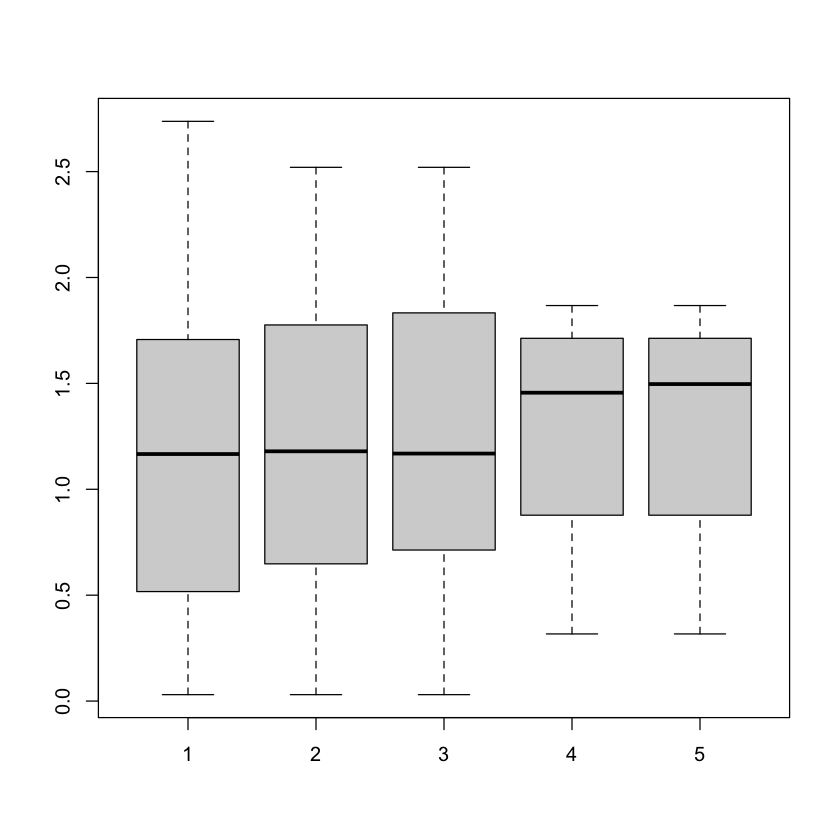

In [6]:
#Using Shannon#
c= merge_samples(fun,"criolabw")
write.table(estimate_richness(c), file="div_c_ITSotus.tsv",append = FALSE, quote = TRUE, sep = "\t")
read.table("div_c_ITSotus.tsv")
cs =read.table("div_c_ITSotus.tsv", header=TRUE, row.names = NULL)
colnames(cs)=c("Sample","Observed","Chao1","SE.Caho1","ACE","SE.ACE","Shannon","Simpson","InvSimpson","Fisher")

d= merge_samples(fun,"distid")
write.table(estimate_richness(d), file="div_disid_ITSotus.tsv",append = FALSE, quote = TRUE, sep = "\t")
read.table("div_disid_ITSotus.tsv")
ds =read.table("div_disid_ITSotus.tsv", header=TRUE, row.names = NULL)
colnames(ds)=c("Sample","Observed","Chao1","SE.Caho1","ACE","SE.ACE","Shannon","Simpson","InvSimpson","Fisher")

m= merge_samples(fun,"mun")
write.table(estimate_richness(m), file="div_m_ITSotus.tsv",append = FALSE, quote = TRUE, sep = "\t")
read.table("div_m_ITSotus.tsv")
ms =read.table("div_m_ITSotus.tsv", header=TRUE, row.names = NULL)
colnames(ms)=c("Sample","Observed","Chao1","SE.Caho1","ACE","SE.ACE","Shannon","Simpson","InvSimpson","Fisher")

st= merge_samples(fun,"state")
write.table(estimate_richness(st), file="div_st_ITSotus.tsv",append = FALSE, quote = TRUE, sep = "\t")
read.table("div_st_ITSotus.tsv")
sts =read.table("div_st_ITSotus.tsv", header=TRUE, row.names = NULL)
colnames(sts)=c("Sample","Observed","Chao1","SE.Caho1","ACE","SE.ACE","Shannon","Simpson","InvSimpson","Fisher")

r= merge_samples(fun,"reg")
write.table(estimate_richness(r), file="div_r_ITSotus.tsv",append = FALSE, quote = TRUE, sep = "\t")
read.table("div_r_ITSotus.tsv")
rs =read.table("div_r_ITSotus.tsv", header=TRUE, row.names = NULL)
colnames(rs)=c("Sample","Observed","Chao1","SE.Caho1","ACE","SE.ACE","Shannon","Simpson","InvSimpson","Fisher")

boxplot(cs$Shannon,ds$Shannon, ms$Shannon,sts$Shannon,rs$Shannon)

#Calculation of unweighted Jaccard distance at OTUs level
c.jacc=phyloseq::distance(c, "jaccard")
d.jacc=phyloseq::distance(d, method="jaccard")
m.jacc=phyloseq::distance(m, method="jaccard")
st.jacc=phyloseq::distance(st, method="jaccard")
r.jacc=phyloseq::distance(r, method="jaccard")

#Calculation of unweighted Bray-Curtis distance at OTUs level

c.bray=phyloseq::distance(c, "bray")
d.bray=phyloseq::distance(d, method="bray")
m.bray=phyloseq::distance(m, method="bray")
st.bray=phyloseq::distance(st, method="bray")
r.bray=phyloseq::distance(r, method="bray")

Warning message in wilcox.test.default(c(0.317002760259384, 1.56419739752998, 1.86750766488992, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.524427215984637, 0.587568005276639, 0.0529453378622646, :
“cannot compute exact p-value with ties”


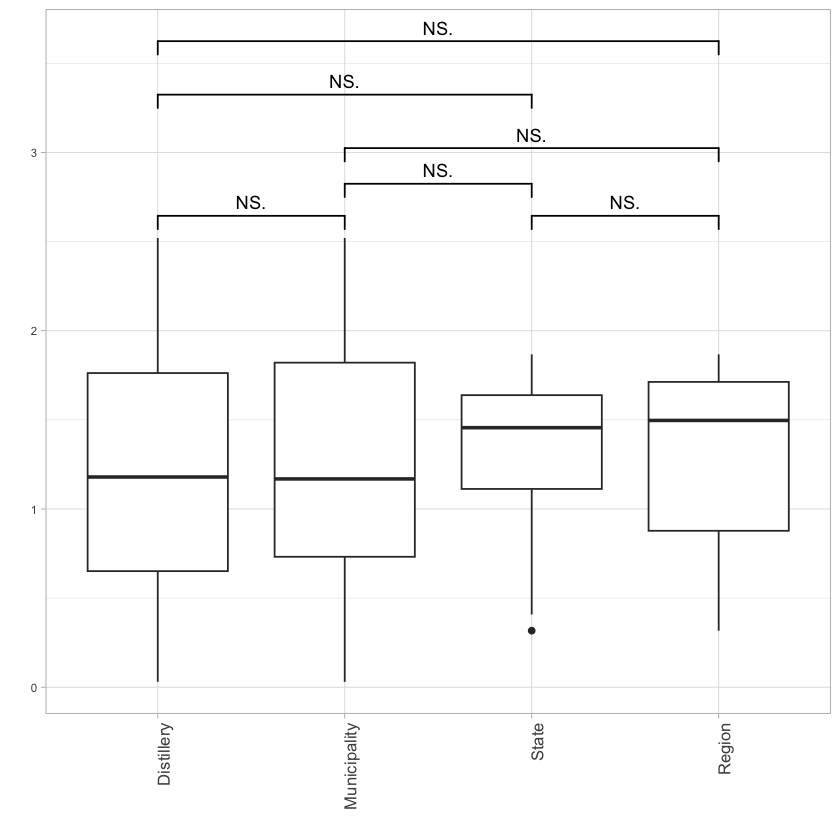

In [7]:
#Plotting to evaluate distillery effect
shan_t=read.table("shannon_all.tsv", header=TRUE, row.names = NULL)
colnames(shan_t)=c("Sample","Shannon")

a=ggplot(data=shan_t, aes(x = Sample, y= Shannon))  + 
    geom_boxplot() + theme_light () +
    xlab("") + ylab("") + 
    theme(axis.text.x = element_text(size=10, angle = 90, hjust = 1),
          axis.text.y = element_text(size = 7)) +
    geom_signif(test = 'wilcox.test', map_signif_level = TRUE, y_position = c(2.7, 3.8),comparisons = list(c("Municipality", "State")))+
    geom_signif(test = 'wilcox.test', map_signif_level = TRUE, y_position = c(3.5, 3.6),comparisons = list(c("Distillery", "Region")))+
    geom_signif(test = 'wilcox.test', map_signif_level = TRUE, y_position = c(3.2, 3.3),comparisons = list(c("Distillery", "State")))+
    geom_signif(test = 'wilcox.test', map_signif_level = TRUE, y_position = c(2.9, 3),comparisons = list(c("Municipality", "Region")))+
    geom_signif(test = 'wilcox.test', map_signif_level = TRUE, comparisons = list(c("State", "Region")))+
    geom_signif(test = 'wilcox.test', map_signif_level = TRUE, comparisons = list(c("Distillery", "Municipality")))

neworder=c("Distillery","Municipality","State","Region")
a$data$Sample <- as.character(a$data$Sample)
a$data$Sample <- factor(a$data$Sample, levels=neworder)
a

#ggsave("shannon_wilcox_ITS.svg")
#ggsave("shannon_wilcox_ITS.pdf")

In [6]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7 taxa and 40 samples ]
sample_data() Sample Data:       [ 40 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 7 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”


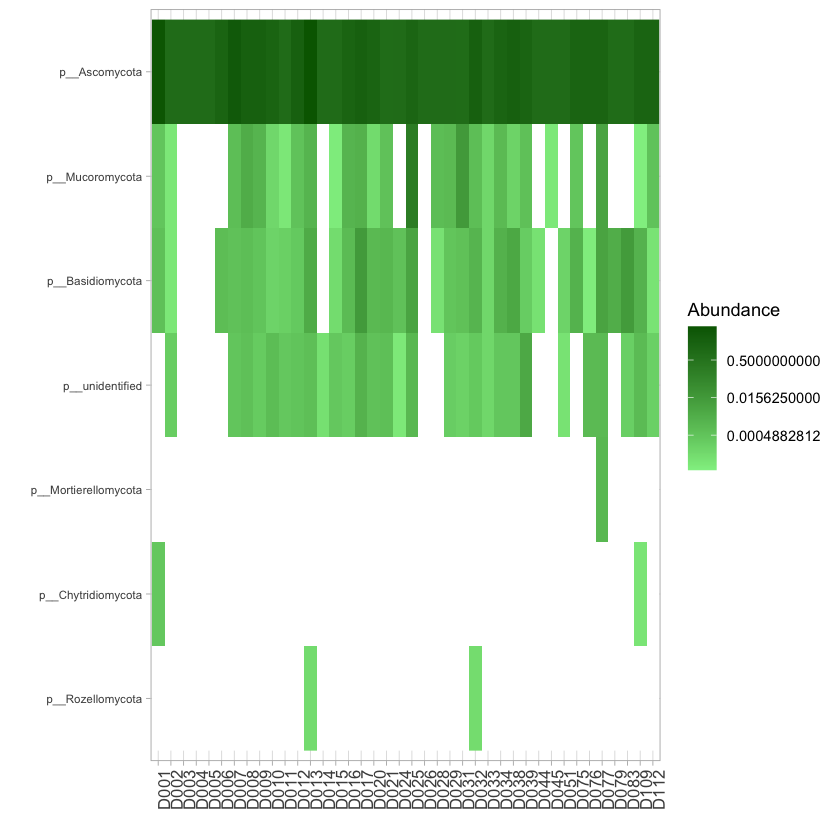

In [94]:
#Obtaining abundances at Phylum level#
phy_fun=tax_glom(fun, "Phylum")
phy_table_c=otu_table(phy_fun)
phy_table_t=tax_table(phy_fun)
write.table(phy_table_c, "phy_glom_counts_fun.tsv")
write.table(phy_table_t, "phy_glom_tax_fun.tsv")
counts_p=as(otu_table(phy_fun), "matrix")
counts_phy=(as.data.frame(counts_p))     

#Grouping samples according to distillery 
rel_dist=merge_samples(rel_phy,"distid")
rel_dist
rel_phy=transform_sample_counts(phy_fun, function(x) x / sum(x))                                

#Plotting Phylum abundance
p <- plot_bar(rel_phy_dist, "Phylum")
#Obatining graph data 
p1 <- p$data
p1 <- as.data.frame(p1)
#Ordering from most abundant to least abundant
p1 <- p1[order(-p1$Abundance),]
write.table(p1,"prueba.tsv")

#Plotting
p_plot = ggplot(data=p1, aes(x = reorder(Sample,distid), y= reorder(Phylum,Abundance), fill= Abundance))  + 
    geom_raster() + theme_light () + xlab("") + ylab("") + 
    scale_fill_gradient(low="light green", high="dark green", na.value = "white", trans = "log2") +
    theme(axis.text.x = element_text(size=10, angle = 90, hjust = 1),
          axis.text.y = element_text(size = 7)) 
 
p_plot

Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning me

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 325 taxa and 40 samples ]
sample_data() Sample Data:       [ 40 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 325 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”


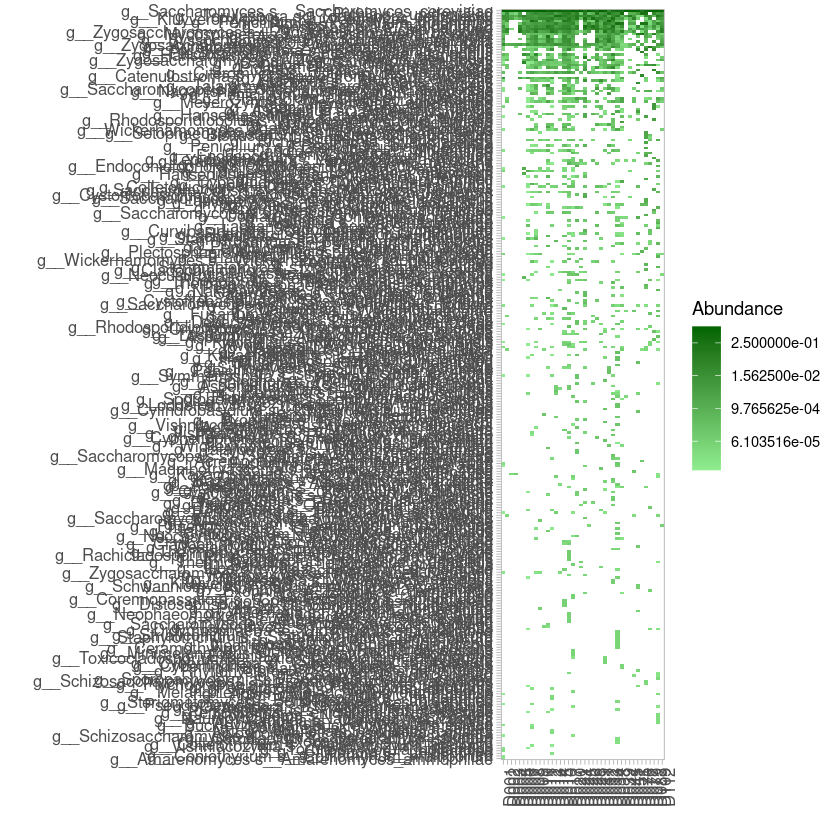

In [8]:
#Obtaining relative abundances at Specie level 
#Tax glom at specie level
sp_fun=tax_glom(fun, "Specie")
sp_fun_c=otu_table(sp_fun)
sp_fun_t=tax_table(sp_fun)
write.table(sp_fun_c,"sp_counts.tsv")
write.table(sp_fun_t,"sp_tax.tsv")

df=as.data.frame(read.table("sp_counts.tsv"))
df=df %>% mutate_if(is.numeric, ~1 * (. > 0))
write.table(df,"pres_abs_sp.tsv")

#Grouping samples according to distillery 
sp_dist=merge_samples(sp_fun,"distid")
rel_sp_dist=transform_sample_counts(sp_dist, function(x) x / sum(x))
rel_sp_dist
p=otu_table(rel_sp_dist)
q=tax_table(rel_sp_dist)
write.table(p,"rel_sp_dist_counts.tsv")
write.table(q,"rel_sp_dist_tax.tsv")
df=as.data.frame(read.table("rel_sp_dist_counts.tsv"))
df=df %>% mutate_if(is.numeric, ~1 * (. > 0))
write.table(df,"pres_abs_sp_dist.tsv")

#Plotting species abundance
s <- plot_bar(rel_sp_dist, "Specie")
#Obatining graph data 
s1 <- s$data
s1 <- as.data.frame(s1)
#Ordering from most abundant to least abundant
s1 <- s1[order(-s1$Abundance),]
#write.table(s1,"abund_values_sp.tsv")

#Plotting
s_plot = ggplot(data=s1, aes(x = reorder(Sample,distid), y= reorder(Specie,Abundance), fill= Abundance))  + 
    geom_raster() + theme_light () +
    xlab("") + ylab("") + 
    scale_fill_gradient(low="light green", high="dark green", na.value = "white", trans = "log2") +
    theme(axis.text.x = element_text(size=10, angle = 90, hjust = 1),
          axis.text.y = element_text(size = 10)) 
s_plot

In [7]:
#Obtaining relative abundances at OTU level 
#Tax glom at specie level
otu_dist=merge_samples(fun,"distid")
otu_dist

#Grouping samples according to distillery 
rel_otu_dist=transform_sample_counts(otu_dist, function(x) x / sum(x))
rel_otu_dist
p=otu_table(rel_otu_dist)
q=tax_table(rel_otu_dist)
write.table(p,"rel_otu_dist_counts.tsv")
write.table(q,"rel_otu_dist_tax.tsv")

df=as.data.frame(read.table("rel_otu_dist_counts.tsv"))
df=df %>% mutate_if(is.numeric, ~1 * (. > 0))
df=t(df)
write.table(df,"pres_abs_otu.tsv")

Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning me

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1118 taxa and 40 samples ]
sample_data() Sample Data:       [ 40 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 1118 taxa by 7 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1118 taxa and 40 samples ]
sample_data() Sample Data:       [ 40 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 1118 taxa by 7 taxonomic ranks ]

In [6]:
library(tidyr)

In [10]:
#Creating new phyloseq object with a new taxonomy column containing all taxonomic ranks. 
#This was done to deal with samples that were not classified up to the same taxonomic rank, leading to inconsistencies. 
#Loading OTU table
otu2=as.matrix(read.table("OTU_wo_zeros.tsv",row.name=1))
colnames(otu2)=c("zr3707.10ITS2","zr3707.3ITS2","zr3707.4ITS2","zr3707.5ITS2","zr3707.6ITS2","zr3707.9ITS2","zr4450.10ITS2","zr4450.11ITS2","zr4450.12ITS2","zr4450.13ITS2","zr4450.15ITS2","zr4450.17ITS2","zr4450.18ITS2","zr4450.20ITS2","zr4450.21ITS2","zr4450.22ITS2","zr4450.23ITS2","zr4450.24ITS2","zr4450.25ITS2","zr4450.28ITS2","zr4450.29ITS2","zr4450.30ITS2","zr4450.31ITS2","zr4450.32ITS2","zr4450.33ITS2","zr4450.34ITS2","zr4450.36ITS2","zr4450.38ITS2","zr4450.40ITS2","zr4450.42ITS2","zr4450.44ITS2","zr4450.45ITS2","zr4450.46ITS2","zr4450.47ITS2","zr4450.49ITS2","zr4450.4ITS2","zr4450.50ITS2","zr4450.53ITS2","zr4450.54ITS2","zr4450.57ITS2","zr4450.5ITS2","zr4450.6ITS2","zr4450.7ITS2","zr4450.8ITS2","zr4450.9ITS2","zr6680.15ITS2","zr6680.17ITS2","zr6680.1ITS2","zr6680.20ITS2","zr6680.26ITS2","zr6680.9ITS2","zr3707.2ITS2","zr3707.7ITS2","zr4450.14ITS2","zr4450.16ITS2","zr4450.19ITS2","zr4450.26ITS2","zr4450.27ITS2","zr4450.35ITS2","zr4450.39ITS2","zr4450.48ITS2","zr4450.55ITS2","zr4450.56ITS2","zr6680.10ITS2","zr6680.11ITS2","zr6680.12ITS2","zr6680.13ITS2","zr6680.14ITS2","zr6680.18ITS2","zr6680.19ITS2","zr6680.22ITS2","zr6680.23ITS2","zr6680.24ITS2","zr6680.25ITS2","zr6680.27ITS2","zr6680.2ITS2","zr6680.3ITS2","zr6680.4ITS2","zr6680.5ITS2","zr6680.6ITS2","zr6680.8ITS2","zr3707.8ITS2","zr4450.3ITS2","zr4450.59ITS2","zr6680.7ITS2","zr4450.2ITS2","zr6680.21ITS2")
otu2=otu2[, c("zr3707.10ITS2","zr3707.3ITS2","zr3707.4ITS2","zr3707.5ITS2","zr3707.6ITS2","zr3707.9ITS2","zr4450.10ITS2","zr4450.11ITS2","zr4450.12ITS2","zr4450.13ITS2","zr4450.15ITS2","zr4450.17ITS2","zr4450.18ITS2","zr4450.20ITS2","zr4450.21ITS2","zr4450.22ITS2","zr4450.23ITS2","zr4450.24ITS2","zr4450.25ITS2","zr4450.28ITS2","zr4450.29ITS2","zr4450.30ITS2","zr4450.31ITS2","zr4450.32ITS2","zr4450.33ITS2","zr4450.34ITS2","zr4450.36ITS2","zr4450.38ITS2","zr4450.40ITS2","zr4450.42ITS2","zr4450.44ITS2","zr4450.45ITS2","zr4450.46ITS2","zr4450.47ITS2","zr4450.49ITS2","zr4450.4ITS2","zr4450.50ITS2","zr4450.53ITS2","zr4450.54ITS2","zr4450.57ITS2","zr4450.5ITS2","zr4450.6ITS2","zr4450.7ITS2","zr4450.8ITS2","zr4450.9ITS2","zr6680.15ITS2","zr6680.17ITS2","zr6680.1ITS2","zr6680.20ITS2","zr6680.26ITS2","zr6680.9ITS2","zr3707.2ITS2","zr3707.7ITS2","zr4450.14ITS2","zr4450.16ITS2","zr4450.19ITS2","zr4450.26ITS2","zr4450.27ITS2","zr4450.35ITS2","zr4450.39ITS2","zr4450.48ITS2","zr4450.55ITS2","zr4450.56ITS2","zr6680.10ITS2","zr6680.11ITS2","zr6680.12ITS2","zr6680.13ITS2","zr6680.14ITS2","zr6680.18ITS2","zr6680.19ITS2","zr6680.22ITS2","zr6680.23ITS2","zr6680.24ITS2","zr6680.25ITS2","zr6680.27ITS2","zr6680.2ITS2","zr6680.3ITS2","zr6680.4ITS2","zr6680.5ITS2","zr6680.6ITS2","zr6680.8ITS2","zr3707.8ITS2","zr4450.3ITS2","zr4450.59ITS2","zr6680.7ITS2","zr4450.2ITS2","zr6680.21ITS2")]
OTU2 = otu_table(otu2, taxa_are_rows=T)

#Loading taxonomy table
tax2=as.matrix(read.table("fun_mp_tax.tsv",row.names=1,fill=TRUE))
colnames(tax2)=c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Specie")
tax2=tax_table(tax2)
no.na = !is.na(tax2[,"Phylum"]) & !is.na(tax2[,"Class"]) & !is.na(tax2[,"Order"]) & !is.na(tax2[,"Family"]) & !is.na(tax2[,"Genus"]) & !is.na(tax2[,"Specie"])
tax2[no.na][,"Specie"] = paste(tax2[no.na][,"Phylum"], tax2[no.na][,"Class"], tax2[no.na][,"Order"], tax2[no.na][,"Family"], tax2[no.na][,"Genus"], tax2[no.na][,"Specie"])
tax2[no.na][,"Family"] = paste(tax2[no.na][,"Phylum"], tax2[no.na][,"Class"], tax2[no.na][,"Order"], tax2[no.na][,"Family"], tax2[no.na][,"Genus"], tax2[no.na][,"Specie"])
tax2[no.na][,"Genus"] = paste(tax2[no.na][,"Phylum"], tax2[no.na][,"Class"], tax2[no.na][,"Order"], tax2[no.na][,"Family"], tax2[no.na][,"Genus"], tax2[no.na][,"Specie"])
tax2[no.na][,"Order"] = paste(tax2[no.na][,"Phylum"], tax2[no.na][,"Class"], tax2[no.na][,"Order"], tax2[no.na][,"Family"], tax2[no.na][,"Genus"], tax2[no.na][,"Specie"])
tax2[no.na][,"Phylum"] = paste(tax2[no.na][,"Phylum"], tax2[no.na][,"Class"], tax2[no.na][,"Order"], tax2[no.na][,"Family"], tax2[no.na][,"Genus"], tax2[no.na][,"Specie"])
tax2[no.na][,"Class"] = paste(tax2[no.na][,"Phylum"], tax2[no.na][,"Class"], tax2[no.na][,"Order"], tax2[no.na][,"Family"], tax2[no.na][,"Genus"], tax2[no.na][,"Specie"])
TAXA2=tax2

#Creating phyloseq object
fun2=phyloseq(OTU2,TAXA2)

#Determine number of OTUs per sample
#sample_sums(fun1)

#Loading metadata table
mezcal_data=read.delim("metadata_ITS_mezcal.tsv", header=TRUE, row.names=1, sep="\t")
mezcal_data=mezcal_data[7:93,]
sampledata2=sample_data(data.frame(SL=mezcal_data$SequencingLabel,criolab=mezcal_data$CriovialLabel,criolabw=mezcal_data$Criovial_label_withIsolates,state=mezcal_data$State, reg=mezcal_data$Region, mun=mezcal_data$Municipality, dist=mezcal_data$Distillery_name, distid=mezcal_data$Distillery_ID, agavesp=mezcal_data$Agave_speciesname,subsp=mezcal_data$Agave_suspeciesname, agavenm=mezcal_data$Agave_commoname, ensmb=mezcal_data$Assemble,fdays=mezcal_data$Fermentation_days,ftotal=mezcal_data$Fermentation_totaldays,fp=mezcal_data$Fermentation_percentage,fer=mezcal_data$Fermentation_range,tankm=mezcal_data$Tank_material, alt=mezcal_data$Altitude, lat=mezcal_data$Latitude_site, long=mezcal_data$Longitude_site, tankt=mezcal_data$Tank_temperatureC,cook=mezcal_data$Cooking_type, alemb=mezcal_data$Alembic_material,grind=mezcal_data$Grinding_type,inoc=mezcal_data$Inoculum,date=mezcal_data$Sample_date_YYYYMMDD, newlat=mezcal_data$NewLatitude_Municipality_Geocode,newlong=mezcal_data$NewLongitude_Municipality_Geocode,tinanm=mezcal_data$Num_de_Tina,loc=mezcal_data$Location_ID,GKd=mezcal_data$Climate_GK,GK=mezcal_data$ClimateGroup_GK,Lp=mezcal_data$Loc_PrecipMediaAnual,Li=mezcal_data$Loc_Isotermalidad,Lt=mezcal_data$Loc_TempMediaAnual,La=mezcal_data$Loc_Altitud_inegi,div=mezcal_data$Shannon_index, divs=mezcal_data$Simpson_index,tc=mezcal_data$time_comp, b=mezcal_data$beverage,seqr=mezcal_data$sequencing_round, ns=mezcal_data$num_samples,row.names=sample_names(fun2)))

#Creating phyloseq object
fun3=phyloseq(OTU2,TAXA2,sampledata2)
fun3

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1118 taxa and 87 samples ]
sample_data() Sample Data:       [ 87 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 1118 taxa by 7 taxonomic ranks ]

In [11]:
#Obtaining relative abundances at Specie level 
#Tax glom at specie level
sp_fun3=tax_glom(fun3, "Specie")
write.table(otu_table(sp_fun3),"rel_sp_counts2.tsv")
df=as.data.frame(read.table("rel_sp_counts2.tsv"))
df=df %>% mutate_if(is.numeric, ~1 * (. > 0))
write.table(df,"pres_abs_sp2.tsv")
#sp_dist3=merge_samples(sp_fun3,"distid")

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 100 taxa and 40 samples ]
sample_data() Sample Data:       [ 40 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 100 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


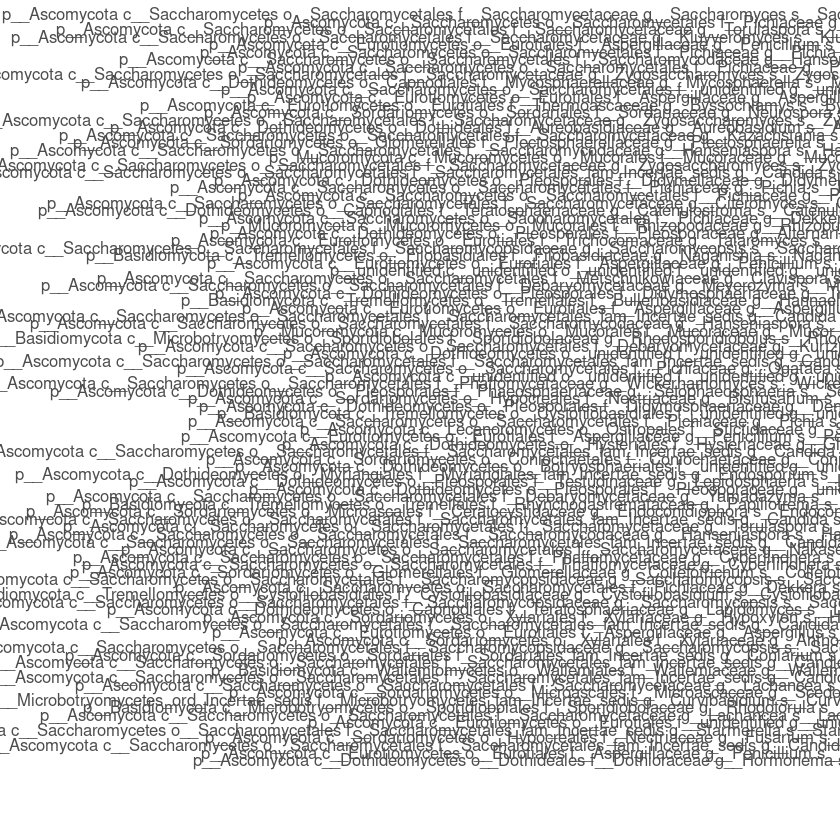

In [65]:
#Plotting only the 100 most abundant species collapsed by distillery 
top100ds <- prune_taxa(names(sort(taxa_sums(rel_sp_dist3),TRUE)[1:100]),rel_sp_dist3)
top100ds 
write.table((otu_table(top100ds)),"rel_100_dist_counts.tsv")
write.table((tax_table(top100ds)),"rel_100_dist_tax.tsv")
#Plotting species abundance
ds100 <- plot_bar(top100ds, "Specie")
##Obatining graph data 
ds100 <- ds100$data
ds100 <- as.data.frame(ds100)

#Ordering from most abundant to least abundant
ds100 <- ds100[order(-ds100$Abundance),]
write.table(ds100,"fun_100_dist_abund.tsv")
top100ds_plot = ggplot(data=ds100, aes(x = reorder(Sample,distid), y= reorder(Specie,Abundance), fill= Abundance))  + 
    geom_raster() + theme_light () +
    xlab("") + ylab("") + 
    scale_fill_gradient(low="light green", high="dark green", na.value = "white", trans = "log2") +
    theme(axis.text.x = element_text(size=9, angle = 90, hjust = 1),
          axis.text.y = element_text(size = 10)) 

#svg(top100ds_plot,"fun_100_dist_abund.svg",width=23, height=17)
top100ds_plot
ggsave("fun_100_dist_abund.svg",width=23, height=17)
#dev.off()

In [ ]:
##Beta diversity analysis##

In [25]:
library(dendextend)
library(paletteer)

In [36]:
#Calculating Jaccard distance for dendrogram
tOTU=t(OTU)
fun.jacc=as.matrix(vegdist(tOTU,"jaccard", header=TRUE,row.names = 1, na.rm=TRUE))
write.table(fun.jacc, "fj.tsv", quote = TRUE, sep = "\t")
fun.jacc=as.matrix(read.table("fj.tsv", header=TRUE, sep = "\t",row.names = 1,as.is=TRUE))
fun.jacc=as.dist(fun.jacc)
#Creating dendrogram
fun.jacc.clust=hclust(fun.jacc)
dend2=as.dendrogram(fun.jacc.clust, hang = -1, check = TRUE)

#Cambiando las etiquetas para que aparezca la destilería y no la muestra#
order_dend=labels(dend2)
subset=sampledata[,c(8)]
subset_ordered=subset[order_dend,]
dend2.2=dend2
labels(dend2.2) <- subset_ordered$distid

pdf("dend_f_dist.pdf", width=15)
plot(dend2.2)
dev.off()

pdf 
  2

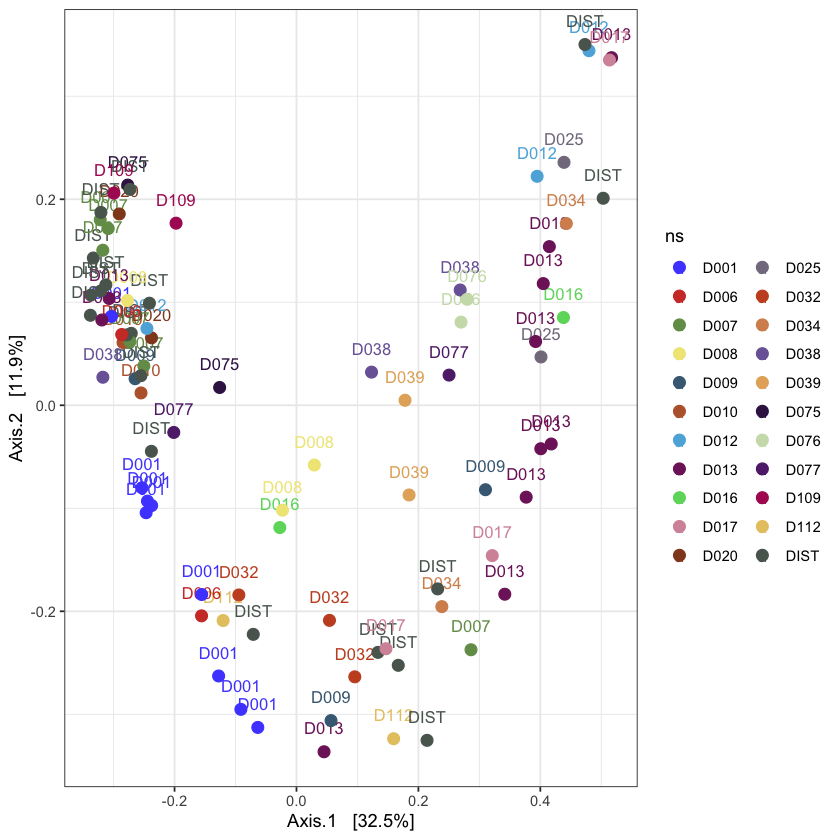

In [27]:
#Jaccard distance for PCoA ordination at OTUs level
fun.PCoA.jacc=ordinate(fun,"PCoA","jaccard")
pcoajac_agc=plot_ordination(fun, fun.PCoA.jacc, type="samples",color="ns")+geom_text(mapping = aes(label = ns), hjust=0.5, vjust=-1.5, size = 3.5) + theme_bw() + geom_point(size = 3)+scale_color_paletteer_d("ggsci::default_igv")
#svg("oo.svg")
pcoajac_agc
#dev.off()

In [ ]:
#Calculating Jaccard distance and running ANOSIM

m=sampledata$distid #ANOSIM statistic R: 0.1703 Significance: 0.0315##
n=sampledata$GK #ANOSIM statistic R: 0.02584 Significance: 0.266
o=sampledata$tankt #ANOSIM statistic R: 0.1031 Significance: 0.0886
p=sampledata$fp #ANOSIM statistic R: 0.05323 Significance: 0.2812
q=sampledata$agavesp #ANOSIM statistic R: -0.02535 Significance: 0.5952
r=sampledata$reg #ANOSIM statistic R: 0.03318 Significance: 0.324
s=sampledata$tankm #ANOSIM statistic R: 0.00649 Significance: 0.4415
t=sampledata$Lp #ANOSIM statistic R: 0.1715 Significance: 0.0148##
u=sampledata$Li #ANOSIM statistic R: 0.1594 Significance: 0.0271##
v=sampledata$Lt #ANOSIM statistic R: 0.1594 Significance: 0.0261##
w=sampledata$La #ANOSIM statistic R: 0.1594 Significance: 0.0268##

fun.jacc=vegdist(tOTU,"jaccard", header=TRUE,row.names = 1, na.rm=TRUE)

a_m= anosim(fun.jacc, m, permutations = 9999)
a_n= anosim(fun.jacc, n, permutations = 9999)
a_o= anosim(fun.jacc, o, permutations = 9999)
a_p= anosim(fun.jacc, p, permutations = 9999)
a_q= anosim(fun.jacc, q, permutations = 9999)
a_r= anosim(fun.jacc, r, permutations = 9999)
a_s= anosim(fun.jacc, s, permutations = 9999)
a_t= anosim(fun.jacc, t, permutations = 9999)
a_u= anosim(fun.jacc, u, permutations = 9999)
a_v= anosim(fun.jacc, v, permutations = 9999)
a_w= anosim(fun.jacc, w, permutations = 9999)

In [ ]:
#Creating heatmaps for Figure 3
#Agave
x <- sampledata$agavesp
sampledata$id.1<-rownames(sampledata)
x <- "Sample"
y <- sampledata$id.1
y$name <- factor(sampledata$id.1, levels= sampledata$id.1)
svg("agv.svg")
ggplot(sampledata, aes(x, y = y$name, fill=agavesp)) + geom_tile() + scale_y_discrete(limits=rev(levels(y)))+scale_color_paletteer_d("ggsci::springfield_simpsons")
dev.off()
ggplot(sampledata, aes(x, y = y$name, fill=agavesp)) + geom_tile() + scale_y_discrete(limits=rev(levels(y))) + scale_color_paletteer_d("ggsci::springfield_simpsons")

In [ ]:
#Shannon
shan <- read.table("div_mezcal_ITSotus.tsv", header=TRUE, row.names=1)
head(shan)
x <- shan$Shannon
shan$id.1<-rownames(shan)
x <- "Sample"
y <- shan$id.1
y$name <- factor(shan$id.1, levels= shan$id.1)
svg("shannon.svg")
ggplot(shan, aes(x, y = y$name, fill=Shannon)) + geom_tile() + scale_y_discrete(limits=rev(levels(y))) + scale_fill_gradient(low="white", high="red")
dev.off()
ggplot(shan, aes(x, y = y$name, fill=Shannon)) + geom_tile() + scale_y_discrete(limits=rev(levels(y))) + scale_fill_gradient(low="white", high="red")

In [ ]:
#Fermentation
x <- sampledata$fp
sampledata$id.1<-rownames(sampledata)
x <- "Sample"
y <- sampledata$id.1
y$name <- factor(sampledata$id.1, levels= sampledata$id.1)
svg("fp.svg")
ggplot(sampledata, aes(x, y = y$name, fill=fp)) + geom_tile() + scale_y_discrete(limits=rev(levels(y)))+ scale_fill_gradient(low="white", high="purple")
dev.off()
ggplot(sampledata, aes(x, y = y$name, fill=fp)) + geom_tile() + scale_y_discrete(limits=rev(levels(y)))+ scale_fill_gradient(low="white", high="purple")

In [ ]:
#Region
x <- sampledata$reg
sampledata$id.1<-rownames(sampledata)
x <- "Sample"
y <- sampledata$id.1
y$name <- factor(sampledata$id.1, levels= sampledata$id.1)
svg("reg.svg")
ggplot(sampledata, aes(x, y = y$name, fill=reg)) + geom_tile() + scale_y_discrete(limits=rev(levels(y)))+scale_color_paletteer_d("colorBlindness::paletteMartin")
dev.off()
ggplot(sampledata, aes(x, y = y$name, fill=reg)) + geom_tile() + scale_y_discrete(limits=rev(levels(y))) + scale_color_paletteer_d("colorBlindness::paletteMartin")

In [ ]:
#Climate
x <- sampledata$GK
sampledata$id.1<-rownames(sampledata)
x <- "Sample"
y <- sampledata$id.1
y$name <- factor(sampledata$id.1, levels= sampledata$id.1)
svg("GK.svg")
ggplot(sampledata, aes(x, y = y$name, fill=GK)) + geom_tile() + scale_y_discrete(limits=rev(levels(y)))+scale_color_paletteer_d("colorBlindness::paletteMartin")
dev.off()
ggplot(sampledata, aes(x, y = y$name, fill=GK)) + geom_tile() + scale_y_discrete(limits=rev(levels(y))) + scale_color_paletteer_d("colorBlindness::paletteMartin")

In [ ]:
#Tank_material
x <- sampledata$tankm
sampledata$id.1<-rownames(sampledata)
x <- "Sample"
y <- sampledata$id.1
y$name <- factor(sampledata$id.1, levels= sampledata$id.1)
svg("tankm.svg")
ggplot(sampledata, aes(x, y = y$name, fill=tankm)) + geom_tile() + scale_y_discrete(limits=rev(levels(y)))+scale_color_paletteer_d("colorBlindness::paletteMartin")
dev.off()
ggplot(sampledata, aes(x, y = y$name, fill=tankm)) + geom_tile() + scale_y_discrete(limits=rev(levels(y))) + scale_color_paletteer_d("colorBlindness::paletteMartin")

In [ ]:
#EVALUATING RELATION WITH GEOGRAPHIC DISTANCE

In [ ]:
#Creating distance matrix using Jaccard distance
fun.jacc=vegdist(tOTU,"jaccard", header=TRUE,row.names = 1, na.rm=TRUE)
fun.jacc=as.matrix(fun.jacc)
write.table(fun.jacc,"sam_dist_jacc_ITSotus.txt")
sam_dist = as.matrix(read.table("sam_dist_jacc_ITSotus.txt", row.names=1))
#sam_dist = sam_dist[-c(1:6),-c(1:6)]
head(sam_dist)

,zr3707.10ITS2,zr3707.1ITS2,zr3707.3ITS2,zr3707.4ITS2,zr3707.5ITS2,zr3707.6ITS2,zr3707.9ITS2,zr4450.10ITS2,zr4450.11ITS2,zr4450.12ITS2,⋯,zr6680.4ITS2,zr6680.5ITS2,zr6680.6ITS2,zr6680.8ITS2,zr3707.8ITS2,zr4450.3ITS2,zr4450.59ITS2,zr6680.7ITS2,zr4450.2ITS2,zr6680.21ITS2
zr3707.10ITS2,0,0,0,0,0,0,0,6.43,6.43,6.43,⋯,564.78,27.39,27.39,27.39,0,20.57,1887.88,27.39,20.57,1121.82
zr3707.1ITS2,0,0,0,0,0,0,0,6.43,6.43,6.43,⋯,564.78,27.39,27.39,27.39,0,20.57,1887.88,27.39,20.57,1121.82
zr3707.3ITS2,0,0,0,0,0,0,0,6.43,6.43,6.43,⋯,564.78,27.39,27.39,27.39,0,20.57,1887.88,27.39,20.57,1121.82
zr3707.4ITS2,0,0,0,0,0,0,0,6.43,6.43,6.43,⋯,564.78,27.39,27.39,27.39,0,20.57,1887.88,27.39,20.57,1121.82
zr3707.5ITS2,0,0,0,0,0,0,0,6.43,6.43,6.43,⋯,564.78,27.39,27.39,27.39,0,20.57,1887.88,27.39,20.57,1121.82
zr3707.6ITS2,0,0,0,0,0,0,0,6.43,6.43,6.43,⋯,564.78,27.39,27.39,27.39,0,20.57,1887.88,27.39,20.57,1121.82



Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = sam_dist, ydis = gd, method = "pearson", permutations = 999) 

Mantel statistic r: 0.08247 
      Significance: 0.101 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0818 0.1163 0.1432 0.1680 
Permutation: free
Number of permutations: 999


NULL

NULL

pdf 
  2

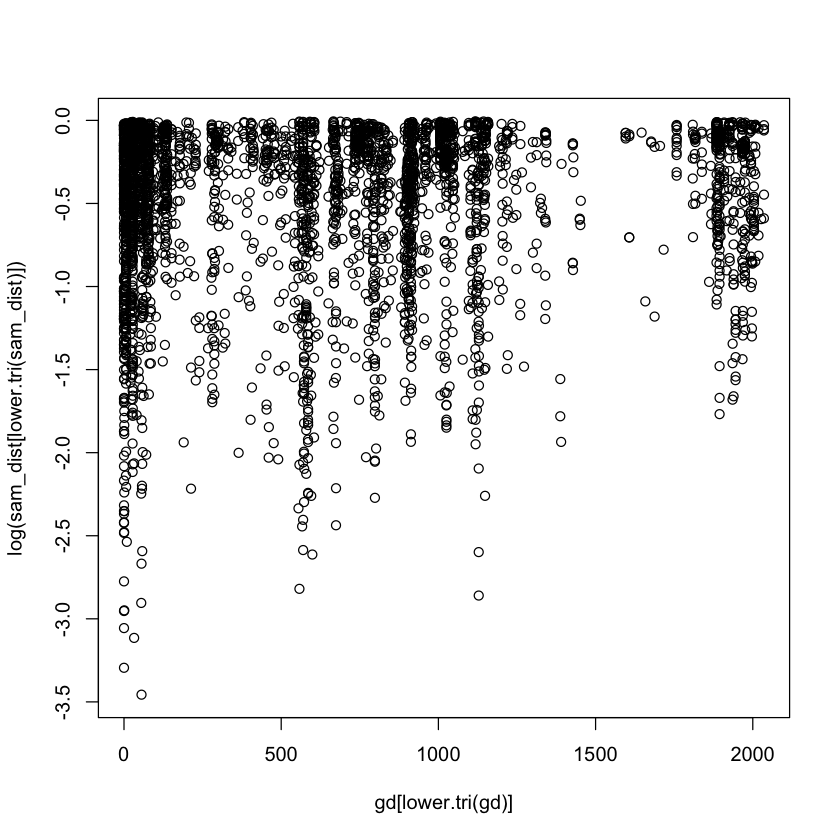

In [38]:
#Loading geographic distance matrix 
gd=as.matrix(read.csv("geo_dist_ITS.csv", header =T, row.names = 1)) #This file was generated using GeographicDistanceMatrixGenerator_v1.2.3
gd[is.na(gd)] = 0
head(gd)

#Mantel test
mantel(sam_dist, gd, method="pearson", permutations=999)
mantel_plot_jacc=plot(gd[lower.tri(gd)], log(sam_dist[lower.tri(sam_dist)]) )
mantel_plot_jacc
svg("mantel_plot_fun.svg")
mantel_plot_jacc=plot((gd[lower.tri(gd)]), log(sam_dist[lower.tri(sam_dist)]))
mantel_plot_jacc
dev.off()

In [ ]:
##TIME SUCCESSION##

In [62]:
#Creating a subset to compare the time succession 
timesp<-filter_taxa(subset_samples(sp_fun,distid=="D007" & seqr=="Third" | distid=="D001"), function (x) {sum(x > 0) > 0}, prune=TRUE)

Saving 7 x 7 in image


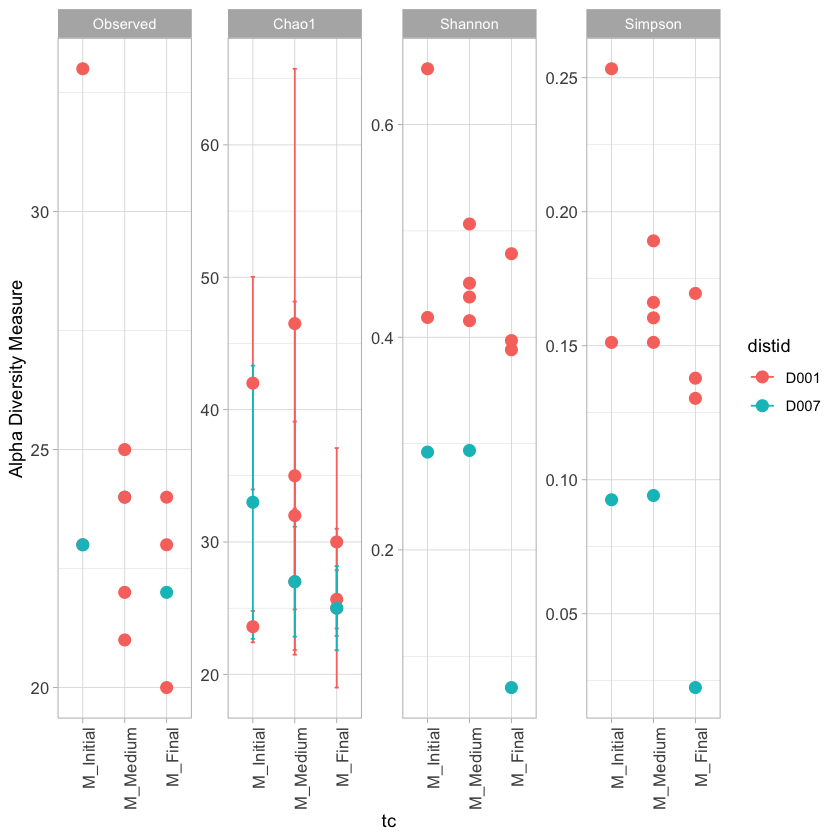

In [60]:
#Estimating diversity indices#
write.table(estimate_richness(timesp), file="div_time_ITSotus.tsv",append = FALSE, 
            quote = TRUE, sep = "\t")
violin_richness=plot_richness(timesp, x="tc", measures=c("Observed", "Shannon", "Simpson",
            "Chao1"), color="distid")+theme_light()+geom_point(size=3)+
            theme(axis.text.y = element_text(size = 10),
            axis.text.x = element_text(size = 10, angle = 90, hjust = 1))

neworder=c("M_Initial","M_Medium","M_Final")

violin_richness$data$tc <- as.character(violin_richness$data$tc)
violin_richness$data$tc <- factor(violin_richness$data$tc, levels=neworder)
print(violin_richness)
ggsave("violin_time_frichness.pdf")

Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object):
“NAs introducidos por coerción”
Warning message in asMethod(object

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 70 taxa and 3 samples ]
sample_data() Sample Data:       [ 3 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 70 taxa by 7 taxonomic ranks ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Saving 7 x 9.5 in image
Warning message:
“Transformation introduced infinite values in discrete y-axis”


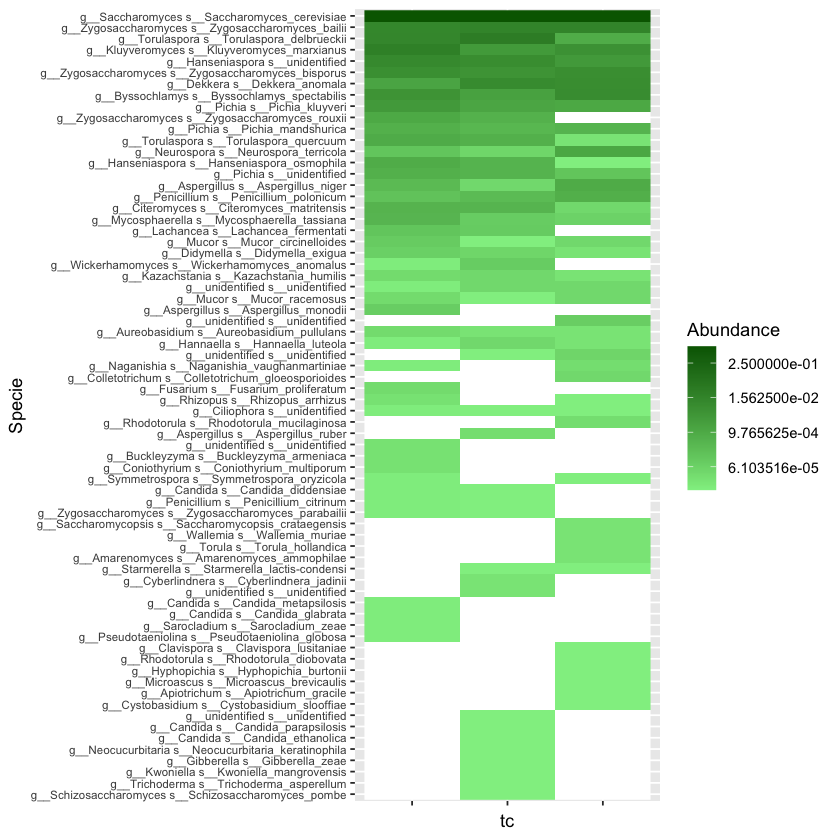

In [73]:
#Obtaining relative abundance to compare the time succession at genus level
time_sp_s=tax_glom(timesp,"Specie")
time_sp_s_m<-merge_samples(time_sp_s,"tc")
time_sp_rel=transform_sample_counts(time_sp_s_m, function(x) x / sum(x))
time_sp_rel

#Creating heatmap
s_time70s_plot <- plot_heatmap(time_sp_rel, taxa.label = "Specie", method = NULL, high = "dark green", 
                              low ="light green", na.value = "white", 
                              taxa.order  = names(sort(taxa_sums(time_sp_rel))), sample.label="tc",sample.order=c("M_Initial", "M_Medium", "M_Final"))+xlab(label = "tc")
s_time70s_plot= s_time70s_plot+ theme (axis.text.x = element_text(size=8), axis.text.y = element_text(size=7))
s_time70s_plot
ggsave("heatmap_ftime_70sp.svg", height=9.5)

Saving 7 x 7 in image


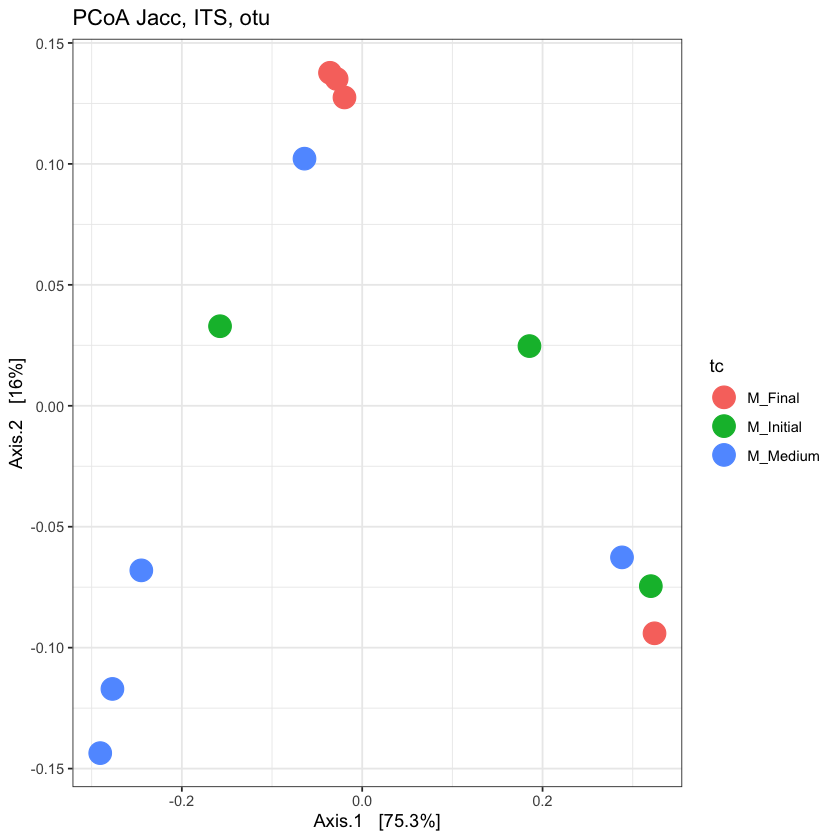

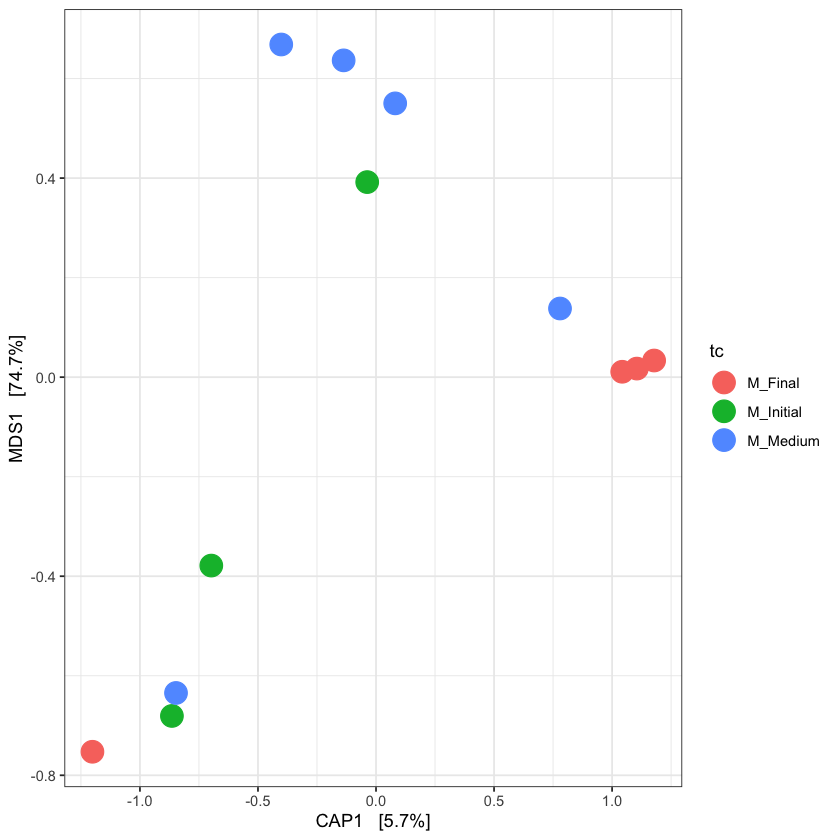

In [92]:
#Unconstrained ordination method (PCoA) using Jaccard for different times
time_gen2.PCoA.jacc=ordinate(timesp,"PCoA","jaccard")
pcoajac_tc=plot_ordination(timesp, time_gen2.PCoA.jacc, type="samples",color="tc",
                           title="PCoA Jacc, ITS, otu")+theme_bw() + geom_point(size = 6)
ggsave("pcoa_jacc_time_ITSotu.svg")
#ggsave("pcoa_jacc_mp_ITSotu_distid.png")
pcoajac_tc

#Constrained ordination method (CAP) using Jaccard for different times
fun_ta.CAP.bray=ordinate(timesp, "CAP", "jaccard", ~fdays)
cap_plot=plot_ordination(timesp, fun_ta.CAP.bray, type="samples",color="tc")+theme_bw()+ 
                geom_point(size = 6)
cap_plot
#ggsave("cap_jacc_time_ITS.svg")

In [78]:
library(DESeq2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following objects are masked from ‘package:base’:

    I, expand.grid, unname


Loading required package:

In [75]:
#Paired comparisons
#Obtain subset to compare by pairs the time succession at OTU level
i=subset_samples(timesp, tc=="M_Initial")
m=subset_samples(timesp, tc=="M_Medium")
i_m=merge_phyloseq(i, m)
i_m

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 70 taxa and 8 samples ]
sample_data() Sample Data:       [ 8 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 70 taxa by 7 taxonomic ranks ]

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): tc M Medium vs M Initial 
Wald test p-value: tc M Medium vs M Initial 
DataFrame with 2 rows and 6 columns
      baseMean log2FoldChange     lfcSE      stat      pvalue       padj
     <numeric>      <numeric> <numeric> <numeric>   <numeric>  <numeric>
458    156.736        2.92799  0.847910   3.45318 0.000554012 0.01578933
2132   243.678       -2.98596  0.776804  -3.84390 0.000121092 0.00690224

Saving 15 x 7 in image


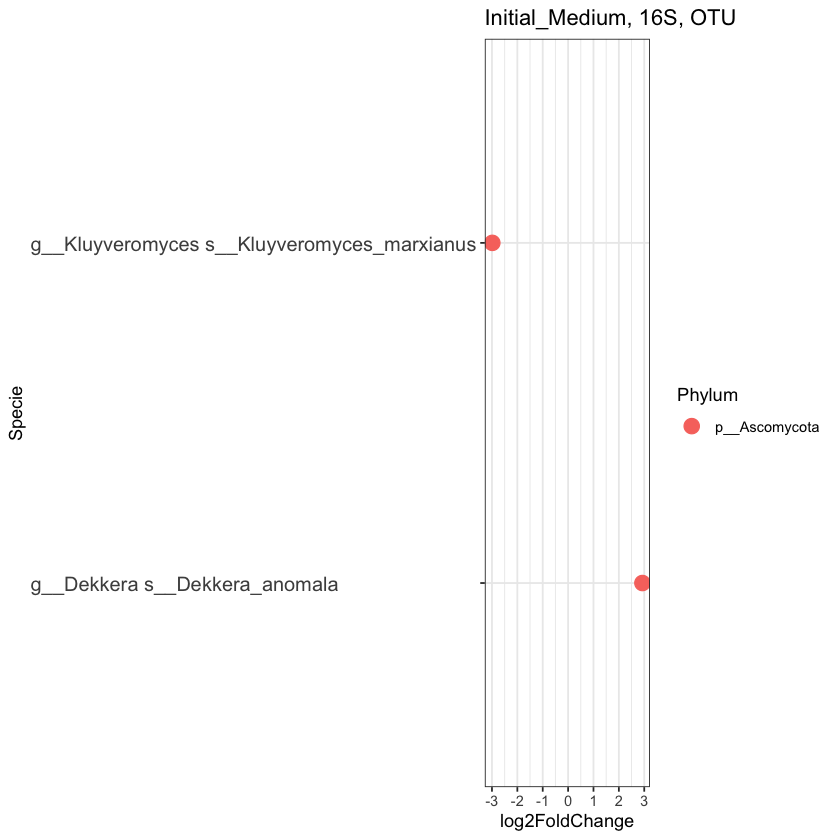

In [88]:
#Converting to DESeq and calling
alpha=0.05
i_m_deseq=phyloseq_to_deseq2(i_m,~tc)
i_m_deseq=DESeq(i_m_deseq,test="Wald",fitType="local")
res_i_m=results(i_m_deseq, cooksCutoff=FALSE)
sigtab_i_m = res_i_m[which(res_i_m$padj < alpha), ]
sigtab_i_m
sigtab_i_m = cbind(as(sigtab_i_m, "data.frame"), as(tax_table(i_m)[rownames(sigtab_i_m), ], "matrix"))

#Exporting tables to csv format 
write.table(sigtab_i_m,file="sigtab_i_m_fun.tsv",sep="\t",row.names=TRUE)

#Plotting DESeq results for Initial and Medium fermentation
theme_set(theme_bw())
scale_fill_discrete <- function(palname = "Set1", ...) {
    scale_fill_brewer(palette = palname, ...)
}
# Phylum order
y = tapply(sigtab_i_m$log2FoldChange, sigtab_i_m$Phylum, function(y) max(y))
y = sort(y, TRUE)
sigtab_i_m$Phylum = factor(as.character(sigtab_i_m$Phylum), levels=names(y))

# Specie order
y = tapply(sigtab_i_m$log2FoldChange, sigtab_i_m$Specie, function(y) max(y))
y = sort(y, TRUE)
sigtab_i_m$Specie = factor(as.character(sigtab_i_m$Specie), levels=names(y))
ggplot(sigtab_i_m, aes(y=Specie, x=log2FoldChange, color=Phylum)) + geom_point(size=4) + ggtitle("Initial_Medium, ITS, OTU") + 
  theme(axis.text.y = element_text(angle = 0, hjust = 0, vjust=0.5, size=12))

#ggsave("deseq_i_m_ITSotu.svg", width=15)

In [84]:
#Obtain subset to compare by pairs the time succession at OTU level
i=subset_samples(timesp, tc=="M_Initial")
f=subset_samples(timesp, tc=="M_Final")
i_f=merge_phyloseq(i, f)
i_f

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 70 taxa and 7 samples ]
sample_data() Sample Data:       [ 7 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 70 taxa by 7 taxonomic ranks ]

In [85]:
#Converting to DESeq and calling
alpha=0.05
i_f_deseq=phyloseq_to_deseq2(i_f,~tc)
i_f_deseq=DESeq(i_f_deseq,test="Wald",fitType="local")
res_i_f=results(i_f_deseq, cooksCutoff=FALSE)
sigtab_i_f = res_i_f[which(res_i_f$padj < alpha), ]
sigtab_i_f
sigtab_i_f = cbind(as(sigtab_i_f, "data.frame"), as(tax_table(i_f)[rownames(sigtab_i_f), ], "matrix"))

#Exporting tables to csv format 
write.table(sigtab_i_f,file="sigtab_i_f_fun.tsv",sep="\t",row.names=TRUE)


#Plotting DESeq results for Initial and Final fermentation
theme_set(theme_bw())
scale_fill_discrete <- function(palname = "Set1", ...) {
    scale_fill_brewer(palette = palname, ...)}

# Phylum order
y = tapply(sigtab_i_f$log2FoldChange, sigtab_i_f$Phylum, function(y) max(y))
y = sort(y, TRUE)
sigtab_i_f$Phylum = factor(as.character(sigtab_i_f$Phylum), levels=names(y))
# Specie order
y = tapply(sigtab_i_f$log2FoldChange, sigtab_i_f$Specie, function(y) max(y))
y = sort(y, TRUE)
sigtab_i_f$Specie = factor(as.character(sigtab_i_f$Specie), levels=names(y))
ggplot(sigtab_i_f, aes(y=Specie, x=log2FoldChange, color=Phylum)) + geom_point(size=4) + ggtitle("Final_Initial, 16S, OTU") + 
  theme(axis.text.y = element_text(angle = 0, hjust = 0, vjust=0.5, size=12))

#ggsave("deseq_i_f_ITSotu.svg", width=15)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): tc M Initial vs M Final 
Wald test p-value: tc M Initial vs M Final 
DataFrame with 0 rows and 6 columns

ERROR: Error in dimnames(x) <- dn: la longitud de 'dimnames' [1] no es igual a la extensión del arreglo


In [86]:
#Obtain subset to compare by pairs the time succession at OTU level
m=subset_samples(timesp, tc=="M_Medium")
f=subset_samples(timesp, tc=="M_Final")
m_f=merge_phyloseq(m, f)
m_f

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 70 taxa and 9 samples ]
sample_data() Sample Data:       [ 9 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 70 taxa by 7 taxonomic ranks ]

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): tc M Medium vs M Final 
Wald test p-value: tc M Medium vs M Final 
DataFrame with 5 rows and 6 columns
      baseMean log2FoldChange     lfcSE      stat      pvalue        padj
     <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
3563   6.17225        3.80427  1.251739   3.03919 2.37215e-03 3.61753e-02
3237   8.60287        5.73469  1.490878   3.84652 1.19806e-04 3.65409e-03
4220   9.44207       -3.92684  1.254472  -3.13028 1.74642e-03 3.55105e-02
3862   6.65425       -3.93218  1.362566  -2.88586 3.90342e-03 4.76218e-02
2711 434.87381        5.81954  0.812776   7.16008 8.06309e-13 4.91848e-11

Saving 15 x 7 in image


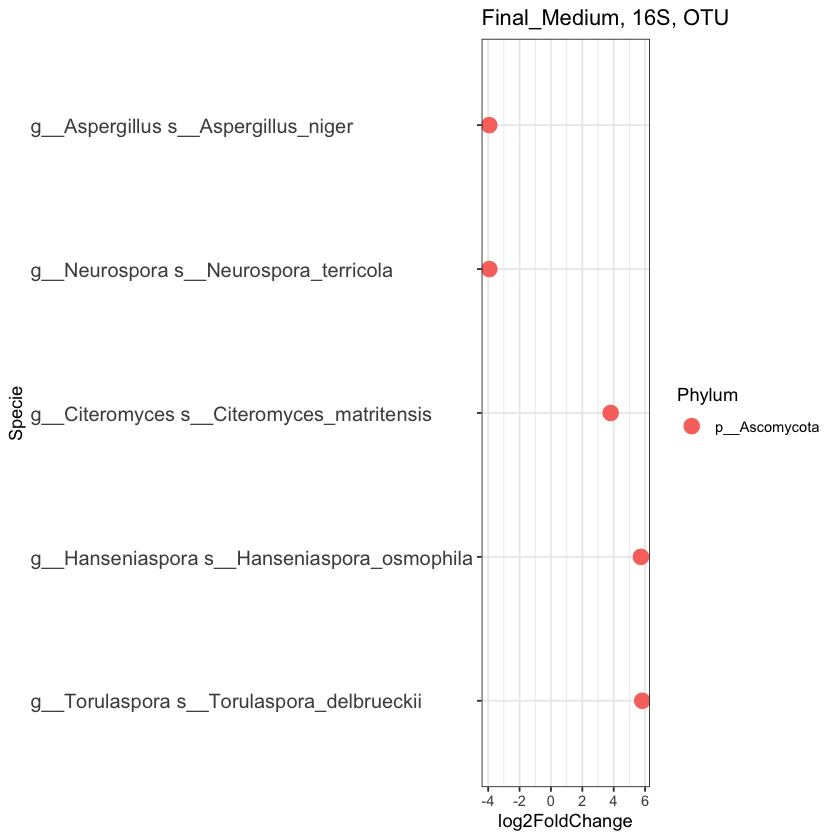

In [87]:
#Converting to DESeq and calling
alpha=0.05
m_f_deseq=phyloseq_to_deseq2(m_f,~tc)
m_f_deseq=DESeq(m_f_deseq,test="Wald",fitType="local")
res_m_f=results(m_f_deseq, cooksCutoff=FALSE)
sigtab_m_f = res_m_f[which(res_m_f$padj < alpha), ]
sigtab_m_f
sigtab_m_f = cbind(as(sigtab_m_f, "data.frame"), as(tax_table(m_f)[rownames(sigtab_m_f), ], "matrix"))

#Exporting tables to csv format 
write.table(sigtab_m_f,file="sigtab_m_f_fun.tsv",sep="\t",row.names=TRUE)


#Plotting DESeq results for Medium and Final fermentation
theme_set(theme_bw())
scale_fill_discrete <- function(palname = "Set1", ...) {
    scale_fill_brewer(palette = palname, ...)
}
# Phylum order
y = tapply(sigtab_m_f$log2FoldChange, sigtab_m_f$Phylum, function(y) max(y))
y = sort(y, TRUE)
sigtab_m_f$Phylum = factor(as.character(sigtab_m_f$Phylum), levels=names(y))
# Specie order
y = tapply(sigtab_m_f$log2FoldChange, sigtab_m_f$Specie, function(y) max(y))
y = sort(y, TRUE)
sigtab_m_f$Specie = factor(as.character(sigtab_m_f$Specie), levels=names(y))
ggplot(sigtab_m_f, aes(y=Specie, x=log2FoldChange, color=Phylum)) + geom_point(size=4) + ggtitle("Final_Medium, ITS, OTU") + 
  theme(axis.text.y = element_text(angle = 0, hjust = 0, vjust=0.5, size=12))

#ggsave("deseq_m_f_ITSotu.svg", width=15)

In [ ]:
##Using pulque samples##

In [3]:
#Loading OTU table
otu2=as.matrix(read.table("fun_mp_otu.tsv",row.name=1))
colnames(otu2)=c("amiel1","amiel2","pulque1", "pulque2", "punta1","punta2","zr3707.10ITS2","zr3707.3ITS2","zr3707.4ITS2","zr3707.5ITS2","zr3707.6ITS2","zr3707.9ITS2","zr4450.10ITS2","zr4450.11ITS2","zr4450.12ITS2","zr4450.13ITS2","zr4450.15ITS2","zr4450.17ITS2","zr4450.18ITS2","zr4450.20ITS2","zr4450.21ITS2","zr4450.22ITS2","zr4450.23ITS2","zr4450.24ITS2","zr4450.25ITS2","zr4450.28ITS2","zr4450.29ITS2","zr4450.30ITS2","zr4450.31ITS2","zr4450.32ITS2","zr4450.33ITS2","zr4450.34ITS2","zr4450.36ITS2","zr4450.38ITS2","zr4450.40ITS2","zr4450.42ITS2","zr4450.44ITS2","zr4450.45ITS2","zr4450.46ITS2","zr4450.47ITS2","zr4450.49ITS2","zr4450.4ITS2","zr4450.50ITS2","zr4450.53ITS2","zr4450.54ITS2","zr4450.57ITS2","zr4450.5ITS2","zr4450.6ITS2","zr4450.7ITS2","zr4450.8ITS2","zr4450.9ITS2","zr6680.15ITS2","zr6680.17ITS2","zr6680.1ITS2","zr6680.20ITS2","zr6680.26ITS2","zr6680.9ITS2","zr3707.2ITS2","zr3707.7ITS2","zr4450.14ITS2","zr4450.16ITS2","zr4450.19ITS2","zr4450.26ITS2","zr4450.27ITS2","zr4450.35ITS2","zr4450.39ITS2","zr4450.48ITS2","zr4450.55ITS2","zr4450.56ITS2","zr6680.10ITS2","zr6680.11ITS2","zr6680.12ITS2","zr6680.13ITS2","zr6680.14ITS2","zr6680.18ITS2","zr6680.19ITS2","zr6680.22ITS2","zr6680.23ITS2","zr6680.24ITS2","zr6680.25ITS2","zr6680.27ITS2","zr6680.2ITS2","zr6680.3ITS2","zr6680.4ITS2","zr6680.5ITS2","zr6680.6ITS2","zr6680.8ITS2","zr3707.8ITS2","zr4450.3ITS2","zr4450.59ITS2","zr6680.7ITS2","zr4450.2ITS2","zr6680.21ITS2")
otu2=otu2[, c("amiel1","amiel2","pulque1", "pulque2", "punta1","punta2","zr3707.10ITS2","zr3707.3ITS2","zr3707.4ITS2","zr3707.5ITS2","zr3707.6ITS2","zr3707.9ITS2","zr4450.10ITS2","zr4450.11ITS2","zr4450.12ITS2","zr4450.13ITS2","zr4450.15ITS2","zr4450.17ITS2","zr4450.18ITS2","zr4450.20ITS2","zr4450.21ITS2","zr4450.22ITS2","zr4450.23ITS2","zr4450.24ITS2","zr4450.25ITS2","zr4450.28ITS2","zr4450.29ITS2","zr4450.30ITS2","zr4450.31ITS2","zr4450.32ITS2","zr4450.33ITS2","zr4450.34ITS2","zr4450.36ITS2","zr4450.38ITS2","zr4450.40ITS2","zr4450.42ITS2","zr4450.44ITS2","zr4450.45ITS2","zr4450.46ITS2","zr4450.47ITS2","zr4450.49ITS2","zr4450.4ITS2","zr4450.50ITS2","zr4450.53ITS2","zr4450.54ITS2","zr4450.57ITS2","zr4450.5ITS2","zr4450.6ITS2","zr4450.7ITS2","zr4450.8ITS2","zr4450.9ITS2","zr6680.15ITS2","zr6680.17ITS2","zr6680.1ITS2","zr6680.20ITS2","zr6680.26ITS2","zr6680.9ITS2","zr3707.2ITS2","zr3707.7ITS2","zr4450.14ITS2","zr4450.16ITS2","zr4450.19ITS2","zr4450.26ITS2","zr4450.27ITS2","zr4450.35ITS2","zr4450.39ITS2","zr4450.48ITS2","zr4450.55ITS2","zr4450.56ITS2","zr6680.10ITS2","zr6680.11ITS2","zr6680.12ITS2","zr6680.13ITS2","zr6680.14ITS2","zr6680.18ITS2","zr6680.19ITS2","zr6680.22ITS2","zr6680.23ITS2","zr6680.24ITS2","zr6680.25ITS2","zr6680.27ITS2","zr6680.2ITS2","zr6680.3ITS2","zr6680.4ITS2","zr6680.5ITS2","zr6680.6ITS2","zr6680.8ITS2","zr3707.8ITS2","zr4450.3ITS2","zr4450.59ITS2","zr6680.7ITS2","zr4450.2ITS2","zr6680.21ITS2")]
OTU2 = otu_table(otu2, taxa_are_rows=T)
#OTU=OTU[,7:93]
#write.table(OTU,"OTU_w_zeros.tsv")

head(OTU2)

#Loading taxonomy table
tax2=as.matrix(read.table("fun_mp_tax.tsv",row.names=1,fill=TRUE))
TAXA2=tax_table(tax2)
colnames(TAXA2)=c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Specie")
no.na = !is.na(TAXA2[,"Genus"]) & !is.na(TAXA2[,"Specie"])
TAXA2[no.na][,"Specie"] = paste(TAXA2[no.na][,"Genus"], TAXA[no.na][,"Specie"])
head(TAXA2)
#Creating phyloseq object
fun2=phyloseq(OTU2,TAXA2)
fun2
#Determine number of OTUs per sample
#sample_sums(fun1)

#Loading metadata table
mezcal_data2=read.delim("metadata_ITS_mezcal.tsv", header=TRUE, row.names=1, sep="\t")
#mezcal_data=mezcal_data[7:93,]
head(mezcal_data2)
sampledata2=sample_data(data.frame(SL=mezcal_data2$SequencingLabel,criolab=mezcal_data2$CriovialLabel,
                    criolabw=mezcal_data2$Criovial_label_withIsolates,state=mezcal_data2$State, 
                    reg=mezcal_data2$Region, mun=mezcal_data2$Municipality, dist=mezcal_data2$Distillery_name, 
                distid=mezcal_data2$Distillery_ID, agavesp=mezcal_data2$Agave_speciesname,
                    subsp=mezcal_data2$Agave_suspeciesname, agavenm=mezcal_data2$Agave_commoname, 
                    ensmb=mezcal_data2$Assemble,fdays=mezcal_data2$Fermentation_days,
                    ftotal=mezcal_data2$Fermentation_totaldays,fp=mezcal_data2$Fermentation_percentage,
                    fer=mezcal_data2$Fermentation_range,tankm=mezcal_data2$Tank_material, alt=mezcal_data2$Altitude,
                    lat=mezcal_data2$Latitude_site, long=mezcal_data2$Longitude_site, 
                    tankt=mezcal_data2$Tank_temperatureC,cook=mezcal_data2$Cooking_type, 
                    alemb=mezcal_data2$Alembic_material,grind=mezcal_data2$Grinding_type,
                    inoc=mezcal_data2$Inoculum,date=mezcal_data2$Sample_date_YYYYMMDD, 
                    newlat=mezcal_data2$NewLatitude_Municipality_Geocode,
                    newlong=mezcal_data2$NewLongitude_Municipality_Geocode,tinanm=mezcal_data2$Num_de_Tina,
                    loc=mezcal_data2$Location_ID,GKd=mezcal_data2$Climate_GK,GK=mezcal_data2$ClimateGroup_GK,
                    Lp=mezcal_data2$Loc_PrecipMediaAnual,Li=mezcal_data2$Loc_Isotermalidad,
                    Lt=mezcal_data2$Loc_TempMediaAnual,La=mezcal_data2$Loc_Altitud_inegi,
                    div=mezcal_data2$Shannon_index, divs=mezcal_data2$Simpson_index,tc=mezcal_data2$time_comp, 
                    b=mezcal_data2$beverage,seqr=mezcal_data2$sequencing_round, ns=mezcal_data2$num_samples,
                    row.names=sample_names(fun2)))

#Creating phyloseq object
fun_mp=phyloseq(OTU2,TAXA2,sampledata2)
fun_mp

,amiel1,amiel2,pulque1,pulque2,punta1,punta2,zr3707.10ITS2,zr3707.3ITS2,zr3707.4ITS2,zr3707.5ITS2,⋯,zr6680.4ITS2,zr6680.5ITS2,zr6680.6ITS2,zr6680.8ITS2,zr3707.8ITS2,zr4450.3ITS2,zr4450.59ITS2,zr6680.7ITS2,zr4450.2ITS2,zr6680.21ITS2
0,20,2,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,19,10,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,142,62,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,31,11,17,6,3,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,37,24,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7,23,13,38,12,40,12,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,Kingdom,Phylum,Class,Order,Family,Genus,Specie
0,k__Fungi,p__Ascomycota,c__Saccharomycetes,o__Saccharomycetales,f__Saccharomycetaceae,g__Torulaspora,g__Torulaspora g__Torulaspora s__Torulaspora_delbrueckii
1,k__Fungi,p__Ascomycota,c__Saccharomycetes,o__Saccharomycetales,f__Saccharomycetaceae,g__Torulaspora,g__Torulaspora g__Torulaspora s__Torulaspora_delbrueckii
2,k__Fungi,p__Ascomycota,c__Dothideomycetes,o__Pleosporales,f__unidentified,g__unidentified,g__unidentified g__unidentified s__unidentified
4,k__Fungi,p__Basidiomycota,c__Microbotryomycetes,o__Sporidiobolales,f__Sporidiobolaceae,g__Rhodotorula,g__Rhodotorula g__Rhodotorula s__Rhodotorula_mucilaginosa
6,k__Fungi,p__Ascomycota,c__Dothideomycetes,o__Capnodiales,f__Mycosphaerellaceae,g__Mycosphaerella,g__Mycosphaerella g__Mycosphaerella s__Mycosphaerella_tassiana
7,k__Fungi,p__Ascomycota,c__Saccharomycetes,o__Saccharomycetales,f__Saccharomycetaceae,g__Saccharomyces,g__Saccharomyces g__Saccharomyces s__Saccharomyces_cerevisiae


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1409 taxa and 93 samples ]
tax_table()   Taxonomy Table:    [ 1409 taxa by 7 taxonomic ranks ]

,SequencingLabel,CriovialLabel,Criovial_label_withIsolates,State,Region,Municipality,Distillery_name,Distillery_ID,Agave_speciesname,Agave_suspeciesname,⋯,Loc_PrecipMediaAnual,Loc_Isotermalidad,Loc_TempMediaAnual,Loc_Altitud_inegi,Shannon_index,Simpson_index,time_comp,beverage,sequencing_round,num_samples
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
amiel1,AM001,AM001,AM001,Hidalgo,Pulque,Unknown,Unknown,PULQUE,Agave salmiana,Unknown,⋯,Unknown,Unknown,Unknown,Unknown,1.858532,0.7608225,P_Initial,Pulque,Pulque,PULQUE
amiel2,AM002,AM002,AM002,Hidalgo,Pulque,Unknown,Unknown,PULQUE,Agave salmiana,Unknown,⋯,Unknown,Unknown,Unknown,Unknown,1.978548,0.7665696,P_Initial,Pulque,Pulque,PULQUE
pulque1,PL001,PL001,PL001,Hidalgo,Pulque,Unknown,Unknown,PULQUE,Agave salmiana,Unknown,⋯,Unknown,Unknown,Unknown,Unknown,2.358437,0.8463758,P_Final,Pulque,Pulque,PULQUE
pulque2,PL002,PL002,PL002,Hidalgo,Pulque,Unknown,Unknown,PULQUE,Agave salmiana,Unknown,⋯,Unknown,Unknown,Unknown,Unknown,2.253677,0.8372989,P_Final,Pulque,Pulque,PULQUE
punta1,PU001,PU001,PU001,Hidalgo,Pulque,Unknown,Unknown,PULQUE,Agave salmiana,Unknown,⋯,Unknown,Unknown,Unknown,Unknown,2.293538,0.8158474,P_Medium,Pulque,Pulque,PULQUE
punta2,PU002,PU002,PU002,Hidalgo,Pulque,Unknown,Unknown,PULQUE,Agave salmiana,Unknown,⋯,Unknown,Unknown,Unknown,Unknown,2.358399,0.8220671,P_Medium,Pulque,Pulque,PULQUE


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1409 taxa and 93 samples ]
sample_data() Sample Data:       [ 93 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 1409 taxa by 7 taxonomic ranks ]

In [6]:
write.table(estimate_richness(fun_mp), file="div_mp_ITSotus.tsv",append = FALSE, quote = TRUE, sep = "\t")
sp_mp=tax_glom(fun_mp,"Specie")
sp_mp
sp_c=otu_table(sp_mp)
sp_t=tax_table(sp_mp)
write.table(sp_c,"sp_mp_counts.tsv")
write.table(sp_t,"sp_mp_tax.tsv")

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 344 taxa and 93 samples ]
sample_data() Sample Data:       [ 93 samples by 42 sample variables ]
tax_table()   Taxonomy Table:    [ 344 taxa by 7 taxonomic ranks ]

In [ ]:
#Creating Venn diagram to compare Mezcal and Pulque
#Creating lists for comparison
merge1 = merge_samples(fun_mp, "b")
write.table(t(otu_table(merge1)), "tmp_mp")
df <-read.table("tmp_mp", header=T, row.names = 1)
k <- which(df>=1, arr.ind=TRUE)
df[k] <- rownames(k)

write.table(df,"Venn_input_sp.txt")
for (ci in 1:ncol(df)) {
    write.csv(df[,ci], paste("col", ci, ".tsv", sep = ""))
}

#awk '{print $2}' Venn_input.txt > Mezcal_sp.txt
#awk '{print $3}' Venn_input.txt > Pulque_sp.txt
#sed -i 's/0//g' Mezcal.txt
#sed -i 's/0//g' Pulque.txt
#https://bioinformatics.psb.ugent.be/webtools/Venn/ para armar los diagramas de Venn y las listas resultantes

In [ ]:
#PCoA using Jaccard distance for mezcal and pulque samples
fun3.PCoA.jacc=ordinate(fun3,"PCoA","jaccard")
pcoajac_pm=plot_ordination(fun3, fun3.PCoA.jacc, type="samples",color="b",title="PCoA Jacc, ITS, otu")+ 
    theme_bw() + geom_point(size = 4)+scale_color_manual(values=c("Mezcal"="dark blue", "Pulque"="red"))
pcoajac_pm
ggsave("pcoa_mzc_plq_jacc.svg")
pcoajac_pm=plot_ordination(fun3, fun3.PCoA.jacc, type="samples",color="b",title="PCoA Jacc, ITS, otu")+
    theme_bw() + geom_point(size = 4)+scale_color_manual(values=c("Mezcal"="dark blue", "Pulque"="red"))